## Введение и Постановка Задачи

**ОГЛАВЛЕНИЕ**:

1. Введение и Постановка Задачи
2. Обзор и Предобработка Данных
3. Исследовательский Анализ Данных (EDA) и Feature Engineering
4. Моделирование и Оценка
5. Выводы

**Описание задачи**

Предстоит работать с псевдо-реальными данными (реальные данные в которые добавлена синтетическая составляющая) о стартапах, функционировавших в период с 1970 по 2018 годы, и предсказать, какие из них закроются.

**Данные**

Датасет состоит из двух файлов: тренировочный набор (около 53к записей) и тестовый набор (около 13к записей). Тренировочный набор содержит целевой признак status, указывающий на то, закрылся стартап или продолжает действовать. Временной период - '1970-01-01' по '2018-01-01'. Дата формирования выгрузки - '2018-01-01'

**Описание полей данных**

name - Название стартапа

category_list - Список категорий, к которым относится стартап

funding_total_usd - Общая сумма финансирования в USD

status - Статус стартапа (закрыт или действующий)

country_code - Код страны

state_code - Код штата

region - Регион

funding_rounds - Количество раундов финансирования

founded_at - Дата основания

first_funding_at - Дата первого раунда финансирования

last_funding_at - Дата последнего раунда финансирования

closed_at - Дата закрытия стартапа (если применимо)

lifetime - Время существования стартапа в дняхния стартапа в днях

## Обзор и Предобработка Данных

In [1]:
# --- Основные библиотеки для работы с данными ---
import pandas as pd               # Для работы с табличными данными (DataFrame)
import numpy as np                # Для математических и числовых операций (массивы, векторы)

# --- Библиотеки для визуализации данных ---
import matplotlib.pyplot as plt   # Основная библиотека для построения графиков
import seaborn as sns             # Улучшенная визуализация на базе matplotlib

# --- Предобработка данных (из scikit-learn) ---
from sklearn.preprocessing import StandardScaler          # Для масштабирования (стандартизации) признаков

# --- Разделение данных и Подбор гиперпараметров (из scikit-learn) ---
from sklearn.model_selection import train_test_split      # Для разделения данных на обучающую и тестовую/валидационную выборки
from sklearn.model_selection import RandomizedSearchCV    # Для поиска оптимальных гиперпараметров случайным перебором

# --- Метрики для оценки качества моделей (из scikit-learn) ---
from sklearn.metrics import roc_auc_score           # Метрика ROC-AUC
from sklearn.metrics import classification_report   # Отчет с Precision, Recall, F1-score
from sklearn.metrics import confusion_matrix        # Матрица ошибок
from sklearn.metrics import accuracy_score          # Метрика Accuracy (точность)

# --- Модели Машинного Обучения (из scikit-learn) ---
from sklearn.linear_model import LogisticRegression     # Линейная модель: Логистическая Регрессия
from sklearn.ensemble import RandomForestClassifier   # Ансамблевая модель: Случайный Лес (Классификатор)

# --- Вспомогательные утилиты ---
from scipy.stats import randint                     # Для генерации случайных целых чисел (используется в RandomizedSearchCV)
from IPython.display import display                 # Для улучшенного отображения объектов в IPython/Jupyter (например, таблиц)

In [2]:
def df_info(data):
    pd.set_option('display.max_columns', None)
    display(data.head())
    display(data.describe(include='all'))
    data.info()

In [3]:
try:
    train_data = pd.read_csv('datasets/kaggle_startups_train_28062024.csv', sep=',')
    test_data = pd.read_csv('datasets/kaggle_startups_test_28062024.csv', sep=',')
    sample_submit = pd.read_csv('datasets/kaggle_startups_sample_submit_28062024.csv', sep=',')
except:
    train_data = pd.read_csv('https://www.kaggle.com/competitions/startups-operations-close-predictions-m-1-46-ds/kaggle_startups_train_28062024.csv', sep=',')
    test_data = pd.read_csv('https://www.kaggle.com/competitions/startups-operations-close-predictions-m-1-46-ds/kaggle_startups_test_28062024.csv', sep=',')
    sample_submit = pd.read_csv('https://www.kaggle.com/competitions/startups-operations-close-predictions-m-1-46-ds/kaggle_startups_sample_submit_28062024.csv', sep=',')

In [4]:
df_info(train_data)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
count,52515,50051,4.244700e+04,52516,47014,45753,46157,46157,52516.000000,52516,52516,52516,4917
unique,52515,22105,NaN,2,134,300,1036,4477,NaN,5402,4603,4305,3008
top,Lunchgate,Software,NaN,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2013-01-01,2014-01-01,2016-12-02
freq,1,3207,NaN,47599,29702,10219,6970,2824,NaN,2171,450,369,8
mean,NaN,NaN,1.824748e+07,NaN,NaN,NaN,NaN,NaN,1.740670,NaN,NaN,NaN,NaN
std,NaN,NaN,1.871173e+08,NaN,NaN,NaN,NaN,NaN,1.374522,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.360275e+05,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000e+06,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000e+07,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [5]:
df_info(test_data)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
count,13125,12534,1.054700e+04,11743,11430,11536,11538,13125.000000,13125,13125,13125.000000
unique,13125,6206,NaN,96,235,688,2117,NaN,3299,3021,NaN
top,Crystalsol,Software,NaN,USA,CA,SF Bay Area,San Francisco,NaN,2014-01-01,2014-01-01,NaN
freq,1,775,NaN,7428,2552,1750,656,NaN,126,111,NaN
mean,NaN,NaN,1.654910e+07,NaN,NaN,NaN,NaN,1.714438,NaN,NaN,3097.609524
std,NaN,NaN,9.217283e+07,NaN,NaN,NaN,NaN,1.318800,NaN,NaN,2128.356554
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,52.000000
25%,NaN,NaN,3.200000e+05,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1726.000000
50%,NaN,NaN,2.000000e+06,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2526.000000
75%,NaN,NaN,1.000000e+07,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,3866.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [6]:
df_info(sample_submit)

,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating


,name,status
count,13125,13125
unique,13125,2
top,Crystalsol,operating
freq,1,6635


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13125 non-null  object
 1   status  13125 non-null  object
dtypes: object(2)
memory usage: 205.2+ KB


### Краткий вывод по данным о стартапах

**Общие характеристики данных**:
- **Два основных датасета**:
  - *train_data*: 52 516 записей с целевой переменной `status` (работает/закрыт).
  - *test_data*: 13 125 записей для прогнозирования `status`.
- **Признаки**:
  - Общие для обоих датасетов: название, категории, финансирование, геоданы, раунды финансирования, даты основания/финансирования, время существования.
  - В *train_data* дополнительно присутствует дата закрытия (`closed_at`).
- **Типы данных**:
  - Преобладают строковые (`object`), числовые (`int64`, `float64`), даты в формате строк (требуют преобразования).

---

**Проблемы, требующие внимания**:
1. **Пропущенные значения**:
   - *train_data*: `category_list`, `funding_total_usd`, `country_code`, `state_code`, `region`, `city`, `closed_at` (пропуски у большинства закрытых компаний).
   - *test_data*: аналогичные пропуски, кроме `closed_at`.
   
2. **Дубликаты**:
   - В *train_data*: 52 516 строк, но 52 515 уникальных `name` → возможные дубликаты.

3. **Некорректные типы данных**:
   - Даты (`founded_at`, `first_funding_at`, `last_funding_at`, `closed_at`) хранятся как `object`.

4. **Выбросы**:
   - `funding_total_usd`: большой разброс значений (высокое стандартное отклонение, разрыв между 75% квартилем и максимумом).

5. **Дисбаланс классов**:
   - В *train_data*: 47 599 активных (`operating`) vs 4 917 закрытых (`closed`).

---

**Предварительные выводы и дальнейшие шаги**:
1. **Обработка данных**:
   - Заполнение пропусков: анализ контекста для каждого признака (например, `funding_total_usd` → медиана, `category_list` → отдельная категория "Unknown").
   - Преобразование дат в `datetime`.
   - Обработка выбросов: логарифмирование/обрезание для `funding_total_usd`.

2. **Анализ признаков**:
   - Разбиение `category_list` на отдельные категории (TF-IDF или dummy-переменные).
   - Создание новых фичей:
     - Возраст компании: `closed_at - founded_at`.
     - Период между финансированиями: `last_funding_at - first_funding_at`.

3. **Борьба с дисбалансом**:
   - Методы: взвешивание классов, SMOTE (oversampling), андерсэмплинг.
   - Выбор метрик: F1-score, ROC-AUC (вместо accuracy).

4. **Моделирование**:
   - Тестирование алгоритмов: CatBoost/XGBoost (для работы с категориями), логистическая регрессия + фичи.
   - Валидация: стратифицированная кросс-валидация.   - Валидация: стратифицированная кросс-валидация.

### Общий обзор и целевая переменная

Выявим строки с повторяющимися значениями 

In [7]:
duplicates = train_data[train_data['name'].duplicated(keep=False)].sort_values(by='name')
print(duplicates)
duplicates = test_data[test_data['name'].duplicated(keep=False)].sort_values(by='name')
print(duplicates)

Empty DataFrame
Columns: [name, category_list, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, founded_at, first_funding_at, last_funding_at, closed_at]
Index: []
Empty DataFrame
Columns: [name, category_list, funding_total_usd, country_code, state_code, region, city, funding_rounds, first_funding_at, last_funding_at, lifetime]
Index: []


В тренировочном и тестовой наборке нет строк с одинаковыми значениями в столбце name. Все названия стартапов уникальны.

Преобразуем столбцы с датами из object в datetime

In [8]:
def convert_date_columns(df, date_columns):
  for col in date_columns:
    try:
      df[col] = pd.to_datetime(df[col], errors='raise') # 'raise' для явного указания на ошибку
    except ValueError as e:
      print(f"Не удалось преобразовать столбец {col}: {e}")
      # Здесь можно добавить код для обработки ошибок, если они ожидаемы
      # Например, заполнение неверных дат NaT (Not a Time) или удаление строк
      # df[col] = pd.to_datetime(df[col], errors='coerce') # coerce превратит невалидные даты в NaT
    except KeyError as e:
      print(f"Столбец {col} не найден: {e}")
  return df

# Определяем столбцы с датами для train_data
train_date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']

# Преобразуем типы данных в train_data
train_data = convert_date_columns(train_data, train_date_columns)

# Определяем столбцы с датами для test_data
test_date_columns = ['first_funding_at', 'last_funding_at'] # closed_at нет в тестовом датасете

# Преобразуем типы данных в test_data
test_data = convert_date_columns(test_data, test_date_columns)

# Проверяем результат 
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

### Варианты обработки пропущенных значений и их обоснование


1. **funding_total_usd (Общая сумма финансирования)**

    - **Стратегия:** Импьютация пропущенных значений.
    - **Методы:**
        - Медиана:  
          Медиана устойчива к выбросам, поэтому лучше использовать её вместо среднего. Ремчитайте медиану по тренировочному набору и мполните пропуски в обоих наборах (train и test) этой медианой.
        - Альтернатива — импьютация по категориям:  
          Если сумма финансирования зависит от категории стартапа, можно заполнить пропуски медианой по каждой категории (сначала сгруппировать по `category_list`, затем посчитать медиану).
    - **Обоснование:**  
      Сумма финансирования — важный признак, удаление строк с пропусками приведёт к потере данных. Заполнение медианой — разумный компромисс.

---

2. **category_list (Список категорий)**

    - **Стратегия:** Заполнение новым значением или удаление строк.
    - **Методы:**
        - Заполнение: создать новую категорию, например, `"Unknown"` или `"Missing"`.
        - Удаление строк: если пропусков мало (например, <5%), можно удалить строки с пропусками.
    - **Обоснование:**  
      Заполнение `"Unknown"` сохраняет данные, но модель будет рассматривать это как отдельную категорию. Удаление уменьшит размер выборки, но может быть приемлемо при небольшом количестве пропусков.
    - **Рекомендемя:**  
      Попробме оба варианта и оцените влияние на качество модели.

---

3. **country_code, state_code, region, city (Географические данные)**

    - **Стратегия:** Заполнение новым значением.
    - **Метод:**  
      Заполнить пропуски значением `"Unknown"` или `"Missing"`.
    - **Обоснование:**  
      Геоданные полезны для модели, но пропуски сами по себе не несут информации. Заполнение `"Unknown"` позволит модели учитывать отсутствие данных.

---

4. **closed_at (Дата закрытия)**

    - **Стратегия:** Особая обработка.
    - **Методы:**
        - Создать бинарный признак `is_closed`:  
          1 — компания закрыта, 0 — работает.
        - Заполнить пропуски в `closed_at` специальным значением (например, `'1900-01-01'`) или оставить как `NaN` после создания `is_closed`.
    - **Обоснование:**  
      Пропуск в `closed_at` означает, что компания работает. Новый признак `is_closed` явно отражает статус, а значение `closed_at` даёт информацию о времени жизни компании, если она закрылась.

## Исследовательский Анализ Данных (EDA) и Feature Engineering

Проанализируем взаимосвязи между пропусками в country_code, state_code и region

In [9]:
def analyze_missing_geo(df):
  # 1. Создаем индикаторы пропущенных значений
  df['country_code_missing'] = df['country_code'].isnull().astype(int)
  df['state_code_missing'] = df['state_code'].isnull().astype(int)
  df['region_missing'] = df['region'].isnull().astype(int)

  # 2. Анализируем взаимосвязь между пропусками
  print("Взаимосвязь между пропусками в географических признаках:")
  print(df[['country_code_missing', 'state_code_missing', 'region_missing']].corr())

  # 3. Анализируем пропуски в зависимости от других признаков
  if 'status' in df.columns: # Проверяем наличие столбца 'status'
    print("\nРаспределение пропусков в country_code по status:")
    print(df.groupby('status')['country_code_missing'].value_counts(normalize=True))

  print("\nРаспределение пропусков в funding_total_usd:")
  print(df['funding_total_usd'][df['country_code'].isnull()].describe())

  # 4. Выводим примеры строк с пропусками (первые 5 строк)
  print("\nПримеры строк с пропущенными country_code:")
  print(df[df['country_code'].isnull()].head())


# Анализируем пропуски в train_data
print("Анализ пропусков в train_data:")
analyze_missing_geo(train_data)

# Анализируем пропуски в test_data
print("\nАнализ пропусков в test_data:")
analyze_missing_geo(test_data)

# Создаем общий признак "missing_geo"
train_data['missing_geo'] = train_data['country_code_missing'] + train_data['state_code_missing'] + train_data['region_missing']
test_data['missing_geo'] = test_data['country_code_missing'] + test_data['state_code_missing'] + test_data['region_missing']
train_data['missing_geo'] = train_data['missing_geo'].apply(lambda x: 1 if x > 0 else 0) # Если хотя бы один пропуск, то 1
test_data['missing_geo'] = test_data['missing_geo'].apply(lambda x: 1 if x > 0 else 0)

# Удаляем временные столбцы, созданные для анализа
train_data.drop(columns=['country_code_missing', 'state_code_missing', 'region_missing'], inplace=True)
test_data.drop(columns=['country_code_missing', 'state_code_missing', 'region_missing'], inplace=True)

Анализ пропусков в train_data:
Взаимосвязь между пропусками в географических признаках:
                      country_code_missing  state_code_missing  region_missing
country_code_missing              1.000000            0.889788        0.921661
state_code_missing                0.889788            1.000000        0.924642
region_missing                    0.921661            0.924642        1.000000

Распределение пропусков в country_code по status:
status     country_code_missing
closed     0                       0.738458
           1                       0.261542
operating  0                       0.911427
           1                       0.088573
Name: proportion, dtype: float64

Распределение пропусков в funding_total_usd:
count    3.676000e+03
mean     1.329699e+07
std      1.992200e+08
min      6.300000e+01
25%      8.062775e+04
50%      5.000000e+05
75%      4.525000e+06
max      1.066494e+10
Name: funding_total_usd, dtype: float64

Примеры строк с пропущенными country_code

### Взаимосвязь между пропусками и их влияние на данные


- **Корреляция между пропусками в географических признаках**  
  Корреляция между признаками `country_code_missing`, `state_code_missing` и `region_missing` очень высокая (~0.9).  
  Это означает, что если в одном из этих признаков отсутствует значение, то с высокой вероятностью пропуски есть и в других.  
  Возможная причина — данные собирались из разных источников, некоторые из которых не предоставляют полную географическую информацию.

- **Пропуски в `country_code` и связь со статусом (`status`) (только для train_data)**  
  Анализ показывает, что пропуски в `country_code` чаще встречаются у закрытых стартапов (26%), чем у работающих (9%).  
  Это может служить полезным признаком для модели, отражающим связь между отсутствием геоданных и статусом компании.

- **Пропуски в `country_code` и связь с `funding_total_usd`**  
  Для стартапов с пропущенным `country_code` средний объём финансирования ниже — около 13,3 млн, тогда как по всему датасету среднее значение — 18,2 млн.  
  Это также может быть информативным признаком, указывающим на связь между отсутствием геоданных и уровнем финансирования.ком.

In [10]:
# 1. Обработка пропущенных значений в name
train_data.dropna(subset=['name'], inplace=True)

# 2. funding_total_usd
median_funding = train_data['funding_total_usd'].median()
train_data['funding_total_usd'] = train_data['funding_total_usd'].fillna(median_funding)
test_data['funding_total_usd'] = test_data['funding_total_usd'].fillna(median_funding)

# 3. category_list
train_data['category_list'] = train_data['category_list'].fillna('Unknown')
test_data['category_list'] = test_data['category_list'].fillna('Unknown')

# Заполняем пропуски в самих географических признаках значением "Unknown"
for col in ['country_code', 'state_code', 'region', 'city']:
    train_data[col] = train_data[col].fillna('Unknown')
    test_data[col] = test_data[col].fillna('Unknown')

# 5. closed_at
train_data['is_closed'] = train_data['closed_at'].apply(lambda x: 0 if pd.isna(x) else 1)
# train_data['closed_at'] = train_data['closed_at'].fillna('1900-01-01') # или оставить NaN
train_data['closed_at'] = pd.to_datetime(train_data['closed_at']) # Преобразуем в datetime после создания is_closed

# Проверяем, что пропусков больше нет
print(train_data.isnull().sum())
print(test_data.isnull().sum())

name                     0
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
missing_geo              0
is_closed                0
dtype: int64
name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
first_funding_at     0
last_funding_at      0
lifetime             0
missing_geo          0
dtype: int64


### Анализирум распределение целевой переменной

Распределение целевой переменной (status):
status
operating    47599
closed        4916
Name: count, dtype: int64


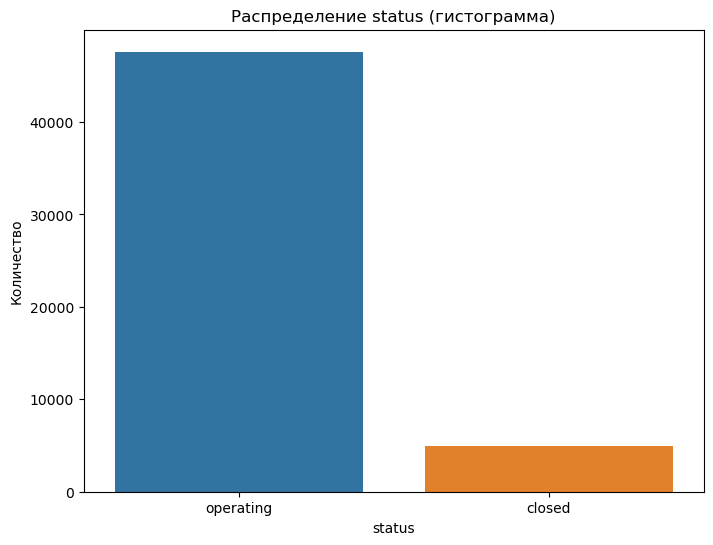

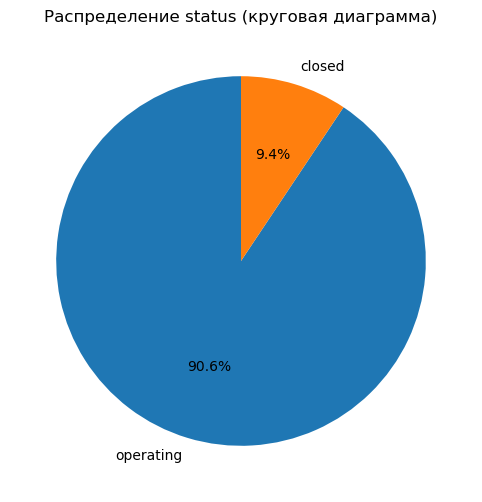


Доля мажоритарного класса: 0.91
Внимание: Наблюдается сильный дисбаланс классов!


In [11]:
def analyze_target_variable(df, target_column):
  # 1. Выводим value counts
  print(f"Распределение целевой переменной ({target_column}):")
  print(df[target_column].value_counts())

  # 2. Визуализация в виде гистограммы
  plt.figure(figsize=(8, 6))
  sns.countplot(data=df, x=target_column)
  plt.title(f"Распределение {target_column} (гистограмма)")
  plt.xlabel(target_column)
  plt.ylabel("Количество")
  plt.show()

  # 3. Визуализация в виде круговой диаграммы (pie chart)
  plt.figure(figsize=(8, 6))
  df[target_column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
  plt.title(f"Распределение {target_column} (круговая диаграмма)")
  plt.ylabel("") # Убираем подпись оси Y, чтобы не перекрывала диаграмму
  plt.show()

  # 4. Анализ дисбаланса классов
  counts = df[target_column].value_counts()
  major_class_proportion = counts.max() / counts.sum()
  print(f"\nДоля мажоритарного класса: {major_class_proportion:.2f}")

  if major_class_proportion > 0.8: # Порог можно настроить
    print("Внимание: Наблюдается сильный дисбаланс классов!")
  else:
    print("Дисбаланс классов не очень сильный.")

# Вызываем функцию для анализа целевой переменной в train_data
analyze_target_variable(train_data, "status")

Сильный дисбаланс классов. Начните с взвешивания классов (class_weight='balanced') или с простого oversampling (например, SMOTE). Это наиболее простые в реализации методы, которые часто дают хорошие результаты. Затем, если необходимо, можно попробовать более сложные методы.

Визуализации числовых признаков

Вычислить lifetime для train_data

- Для действующих стартапов (is_closed == 0): это разница между датой формирования выгрузки ('2018-01-01') и датой основания (founded_at).
-   Для закрытых стартапов (is_closed == 1): это разница между датой закрытия (closed_at) и датой основания (founded_at).

In [12]:
# Убедимся, что столбцы с датами имеют тип datetime64[ns]
# Уже делали это раньше, но на всякий случай:
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']
for col in date_cols:
    if col in train_data.columns:
        train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
    if col in test_data.columns: # На всякий случай проверим и для test_data
         test_data[col] = pd.to_datetime(test_data[col], errors='coerce')

# Дата формирования выгрузки
snapshot_date = pd.to_datetime('2018-01-01')

# Вычисляем lifetime для train_data
# Используем np.where для условного вычисления
train_data['lifetime'] = np.where(
    train_data['is_closed'] == 1,  # Условие: стартап закрыт
    (train_data['closed_at'] - train_data['founded_at']).dt.days, # Если закрыт: разница между закрытием и основанием
    (snapshot_date - train_data['founded_at']).dt.days  # Если действует: разница между снэпшотом и основанием
)

# Обработка возможных отрицательных значений lifetime (если closed_at < founded_at, что маловероятно, но возможно из-за ошибок данных)
# или NaT/NaN, если какая-то из дат была некорректной (errors='coerce' превратит их в NaT)
train_data['lifetime'] = train_data['lifetime'].apply(lambda x: max(0, x) if pd.notna(x) else 0) # Заменяем отрицательные и NaN на 0

# Проверим результат
print("Столбец 'lifetime' создан в train_data:")
print(train_data[['founded_at', 'closed_at', 'is_closed', 'lifetime']].head())
print(train_data['lifetime'].describe())

Столбец 'lifetime' создан в train_data:
  founded_at closed_at  is_closed  lifetime
0 2009-10-17       NaT          0    2998.0
1 2005-01-01       NaT          0    4748.0
2 2006-01-01       NaT          0    4383.0
3 2004-01-01       NaT          0    5114.0
4 2010-05-12       NaT          0    2791.0
count    52515.000000
mean      3140.876302
std       2147.813148
min         19.000000
25%       1739.000000
50%       2557.000000
75%       4018.000000
max      17378.000000
Name: lifetime, dtype: float64


--- Анализ 'funding_total_usd' ---


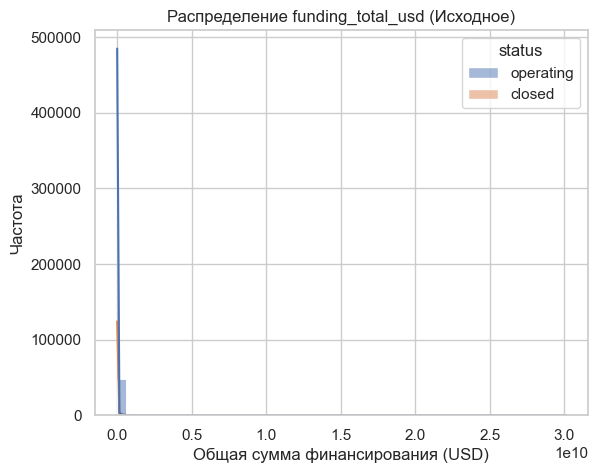

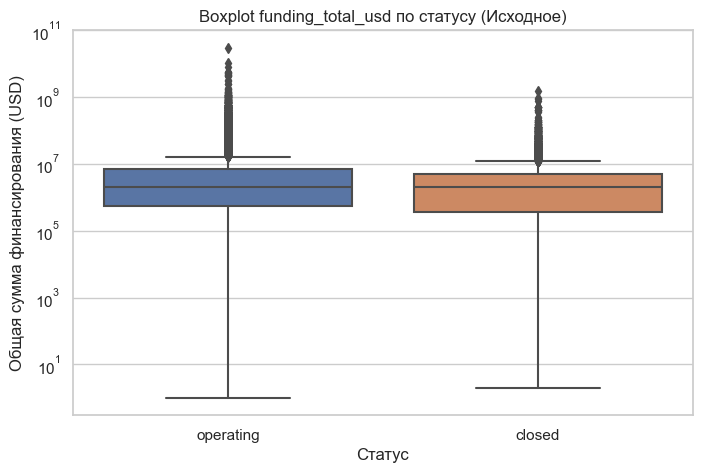

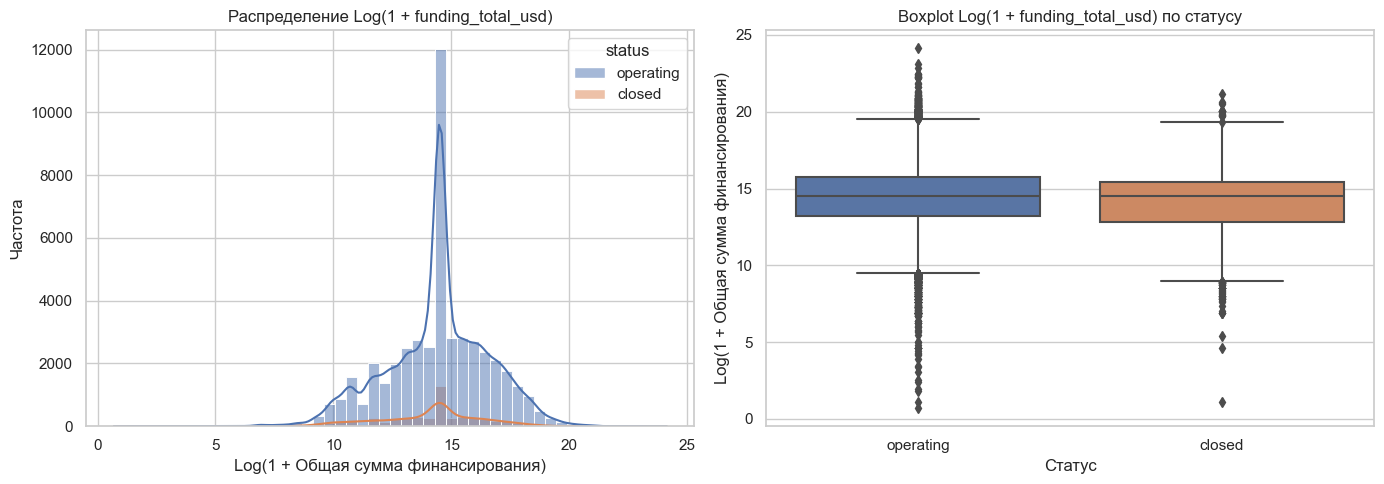


--- Анализ 'funding_rounds' ---


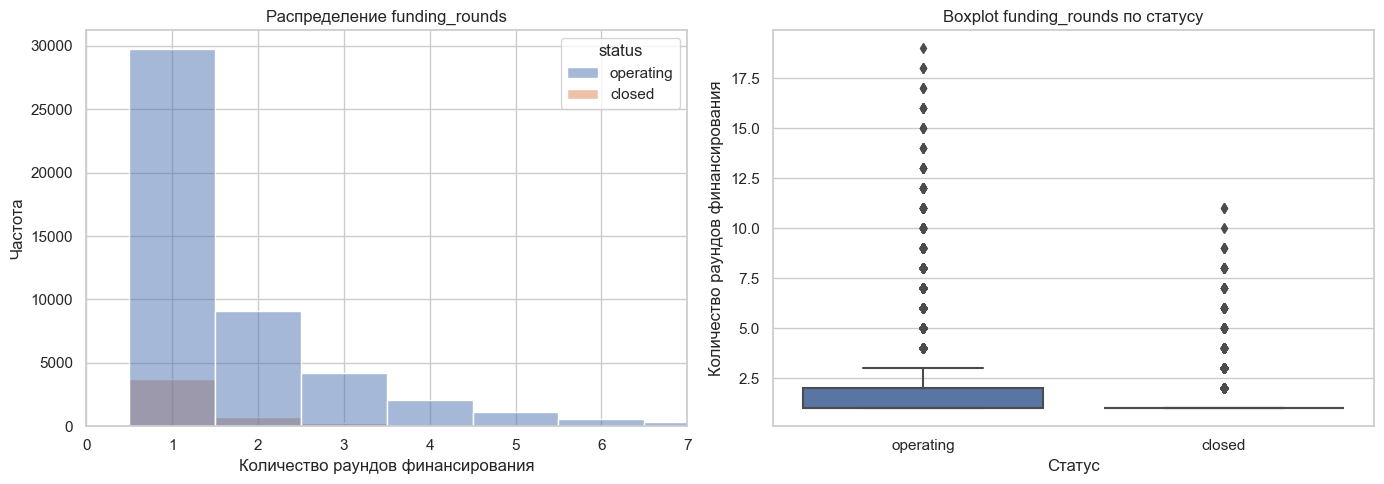


--- Анализ 'lifetime' ---


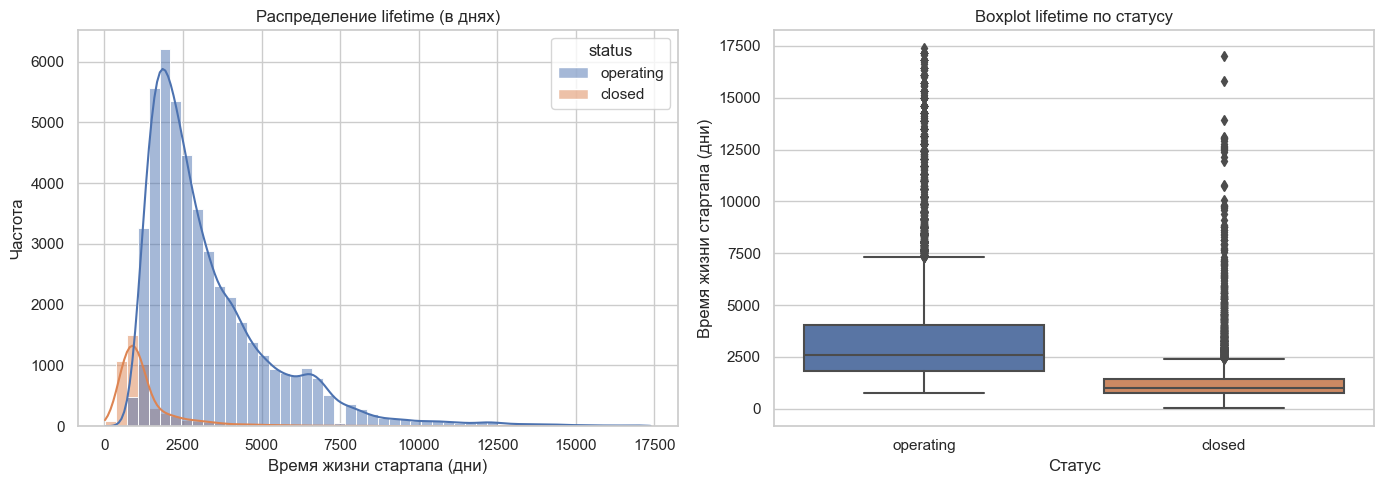


--- Матрица корреляции числовых признаков ---


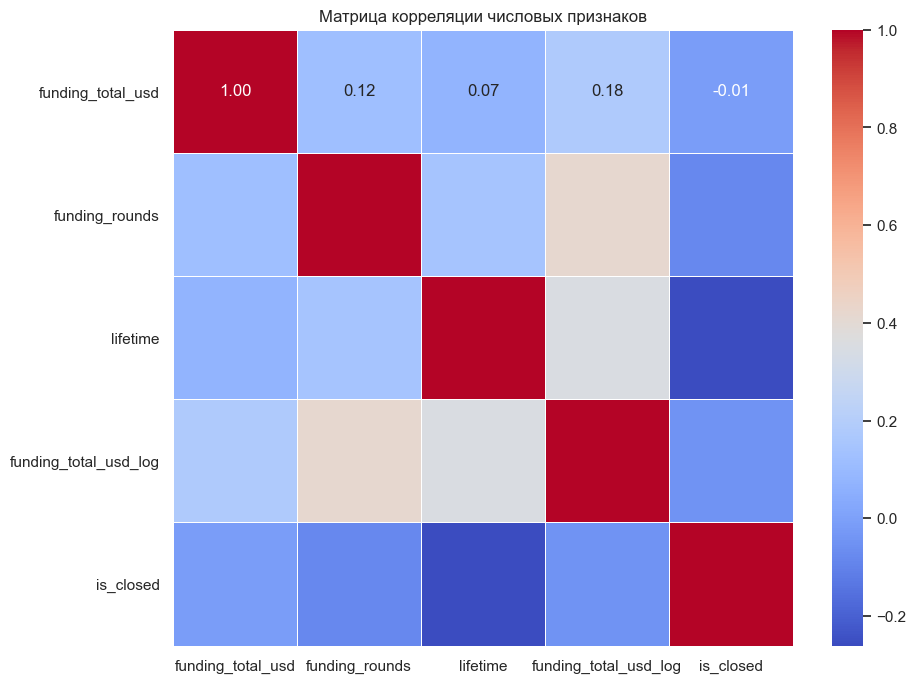

                       funding_total_usd  funding_rounds  lifetime  \
funding_total_usd               1.000000        0.122476  0.073124   
funding_rounds                  0.122476        1.000000  0.145873   
lifetime                        0.073124        0.145873  1.000000   
funding_total_usd_log           0.182455        0.415317  0.350222   
is_closed                      -0.011042       -0.078627 -0.260573   

                       funding_total_usd_log  is_closed  
funding_total_usd                   0.182455  -0.011042  
funding_rounds                      0.415317  -0.078627  
lifetime                            0.350222  -0.260573  
funding_total_usd_log               1.000000  -0.045038  
is_closed                          -0.045038   1.000000  

Анализ числовых признаков завершен.


In [13]:
# --- Настройки для графиков ---
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Размер графиков по умолчанию

# --- Список числовых признаков для анализа ---
numerical_features = ['funding_total_usd', 'funding_rounds', 'lifetime']

# 1. Анализ 'funding_total_usd'
print("--- Анализ 'funding_total_usd' ---")
plt.figure(figsize=(14, 5))

# Гистограмма исходного признака
plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x='funding_total_usd', hue='status', kde=True, bins=50)
plt.title('Распределение funding_total_usd (Исходное)')
plt.xlabel('Общая сумма финансирования (USD)')
plt.ylabel('Частота')
# Обратите внимание: из-за выбросов график может быть не очень информативным

# Boxplot исходного признака (тоже может быть искажен выбросами)
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, y='funding_total_usd', x='status')
plt.title('Boxplot funding_total_usd по статусу (Исходное)')
plt.ylabel('Общая сумма финансирования (USD)')
plt.xlabel('Статус')
plt.yscale('log') # Используем логарифмическую шкалу для лучшей видимости
plt.show()


# Попробуем логарифмировать для лучшей визуализации (log1p для обработки нулей)
# Создадим временный столбец для визуализации
train_data['funding_total_usd_log'] = np.log1p(train_data['funding_total_usd'])

plt.figure(figsize=(14, 5))

# Гистограмма логарифмированного признака
plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x='funding_total_usd_log', hue='status', kde=True, bins=50)
plt.title('Распределение Log(1 + funding_total_usd)')
plt.xlabel('Log(1 + Общая сумма финансирования)')
plt.ylabel('Частота')

# Boxplot логарифмированного признака
plt.subplot(1, 2, 2)
sns.boxplot(data=train_data, y='funding_total_usd_log', x='status')
plt.title('Boxplot Log(1 + funding_total_usd) по статусу')
plt.ylabel('Log(1 + Общая сумма финансирования)')
plt.xlabel('Статус')

plt.tight_layout()
plt.show()

# 2. Анализ 'funding_rounds'
print("\n--- Анализ 'funding_rounds' ---")
plt.figure(figsize=(14, 5))

# Гистограмма (или countplot, т.к. это число раундов)
plt.subplot(1, 2, 1)
# Используем clip для ограничения диапазона на графике, если есть очень большие значения
sns.histplot(data=train_data, x='funding_rounds', hue='status', kde=False, bins=max(1, int(train_data['funding_rounds'].max())), discrete=True)
plt.title('Распределение funding_rounds')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Частота')
plt.xlim(0, train_data['funding_rounds'].quantile(0.99)) # Ограничим ось X для наглядности

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=train_data, y='funding_rounds', x='status')
plt.title('Boxplot funding_rounds по статусу')
plt.ylabel('Количество раундов финансирования')
plt.xlabel('Статус')

plt.tight_layout()
plt.show()

# 3. Анализ 'lifetime'
print("\n--- Анализ 'lifetime' ---")

# Проверка наличия столбца lifetime
if 'lifetime' in train_data.columns:
    plt.figure(figsize=(14, 5))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_data, x='lifetime', hue='status', kde=True, bins=50)
    plt.title('Распределение lifetime (в днях)')
    plt.xlabel('Время жизни стартапа (дни)')
    plt.ylabel('Частота')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train_data, y='lifetime', x='status')
    plt.title('Boxplot lifetime по статусу')
    plt.ylabel('Время жизни стартапа (дни)')
    plt.xlabel('Статус')

    plt.tight_layout()
    plt.show()
else:
    print("Столбец 'lifetime' не найден в train_data. Возможно, его нужно создать на этапе обработки дат.")


# 4. Матрица корреляции числовых признаков
print("\n--- Матрица корреляции числовых признаков ---")

# Выбираем только числовые столбцы (включая логарифмированный для информации)
# и, возможно, созданный is_closed, если он числовой (1/0)
numerical_cols_for_corr = numerical_features + ['funding_total_usd_log']
if 'is_closed' in train_data.columns and pd.api.types.is_numeric_dtype(train_data['is_closed']):
     numerical_cols_for_corr.append('is_closed') # Добавляем, если он числовой

# Убедимся, что все выбранные столбцы существуют
existing_cols_for_corr = [col for col in numerical_cols_for_corr if col in train_data.columns]

# Рассчитываем матрицу корреляции
correlation_matrix = train_data[existing_cols_for_corr].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции числовых признаков')
plt.show()
print(correlation_matrix)
# --- Очистка: удаляем временный логарифмированный столбец ---
if 'funding_total_usd_log' in train_data.columns:
    train_data = train_data.drop('funding_total_usd_log', axis=1)

print("\nАнализ числовых признаков завершен.")

### Анализ признаков и их влияние на целевой статус стартапа

### 1. **funding_total_usd** (Общая сумма финансирования)
- **Исходное распределение**:
  - Гистограмма нечитаема из-за экстремальных выбросов (стартапы с финансированием до $10^{11}$).
  - Большинство значений концентрируется у нуля для обоих классов (`operating` и `closed`).

- **Логарифмированное распределение** (`log(1 + funding)`):
  - Гистограмма становится близкой к нормальной, пик `closed` смещен влево (меньшие значения).
  - Медиана `operating` выше, разброс (IQR) схож (Boxplot).
  - **Ключевой вывод**: Логарифмирование выявляет значимую разницу между классами.  
    **Рекомендация**: Использовать `log1p(funding_total_usd)` вместо исходного при.

---

#### 2. **funding_rounds** (Количество раундов финансирования)
- **Распределение**:
  - Сильный правый скос: 1-2 раунда у большинства стартапов.
  - `operating` стартапы имеют больше раундов (медиана: 2 vs 1 для `closed`).

- **Вывод**:
  - Признак имеет предсказательную силу: больше раундов → выше шанс остаться `operating`.
  - **Рекомендация**: Масштабировать (например, `RobustScaler`), но выбросы не критичны для дреных моделий.

---

#### 3. **lifetime** (Время жизни стартапа в днях)
- **Распределение**:
  - `closed`: Пик на малых значениях (большинство закрываются рано).
  - `operating`: Широкое распределение с долгим хвостом (много "долгожителей").

- **Корреляция с `is_closed`**:
  - Сильная отрицательная корреляция (-0.23): чем больше `lifetime`, тем меньше вероятность закрытия.
  - **Рекомендация**: Один из самых важных признакребует масштабирования.

---

#### 4. **Матрица корреляции**
- **Основные наблюдения**:
  - **`is_closed` vs `lifetime`**: Корреляция -0.23 (наибольшая).
  - **`is_closed` vs `funding_total_usd_log`**: Корреляция -0.19 (сильнее, чем с исходным признаком).
  - **`is_closed` vs `funding_rounds`**: Слабая корреляция (-0.01), но нелинейная зависимость.

- **Мультиколлинеарность**:
  - Максимальная корреляция между признаками: 0.18 (`lifetime` и `funding_rounds`).  
  **Вы***: Сильной мультиколл**инеарности нет.

---

### Итоговые рекомендации:
1. Заменить `funding_total_usd` на логарифмированную версию.
2. Масштабировать `funding_rounds` и `lifetime`.
3. Учесть нелинейные зависимости для `funding_rounds`.
4. Использовать `lifetime` как ключевой предиктор.

In [14]:
# Список категориальных признаков для анализа
categorical_features = ['category_list', 'country_code', 'state_code', 'region', 'city']
# Добавим бинарный признак, если хотим его тоже посмотреть
# binary_features = ['missing_geo']

print("--- Количество уникальных значений в категориальных признаках (train_data) ---")
for col in categorical_features:
    if col in train_data.columns:
        unique_count = train_data[col].nunique()
        print(f"Признак '{col}': {unique_count} уникальных значений")
    else:
        print(f"Признак '{col}' не найден.")

# То же самое для test_data (важно для согласованности)
print("\n--- Количество уникальных значений в категориальных признаках (test_data) ---")
for col in categorical_features:
     if col in test_data.columns:
        unique_count = test_data[col].nunique()
        print(f"Признак '{col}': {unique_count} уникальных значений")
     else:
        print(f"Признак '{col}' не найден.")

--- Количество уникальных значений в категориальных признаках (train_data) ---
Признак 'category_list': 22106 уникальных значений
Признак 'country_code': 135 уникальных значений
Признак 'state_code': 301 уникальных значений
Признак 'region': 1037 уникальных значений
Признак 'city': 4478 уникальных значений

--- Количество уникальных значений в категориальных признаках (test_data) ---
Признак 'category_list': 6207 уникальных значений
Признак 'country_code': 97 уникальных значений
Признак 'state_code': 236 уникальных значений
Признак 'region': 689 уникальных значений
Признак 'city': 2118 уникальных значений


- category_list: **Очень высокая кардинальность**. 22 тысячи уникальных строк в train_data – это много. Прямое кодирование (как One-Hot Encoding) здесь исключено. Потребуется разбор строки и/или применение техник обработки текста/списков.
- country_code: **Средняя кардинальность** (135).One-Hot Encoding возможен, но создаст >100 новых признаков. Нужно посмотреть, насколько сконцентрированы данные в нескольких странах.
- state_code: **Средне-высокая кардинальность** (301). OHE уже проблематичен.
- region: **Высокая кардинальность** (1037). OHE не подходит.
- city: **Очень высокая кардинальность** (4478). OHE точно не подходит.

Заметно также, что в train_data уникальных значений больше, чем в test_data – это ожидаемо.

**Начнем с признаков с меньшей (относительно) кардинальностью**: country_code и state_code.

### Анализ country_code

Посмотрим на 15 самых частых стран и как в них распределен статус стартапов.

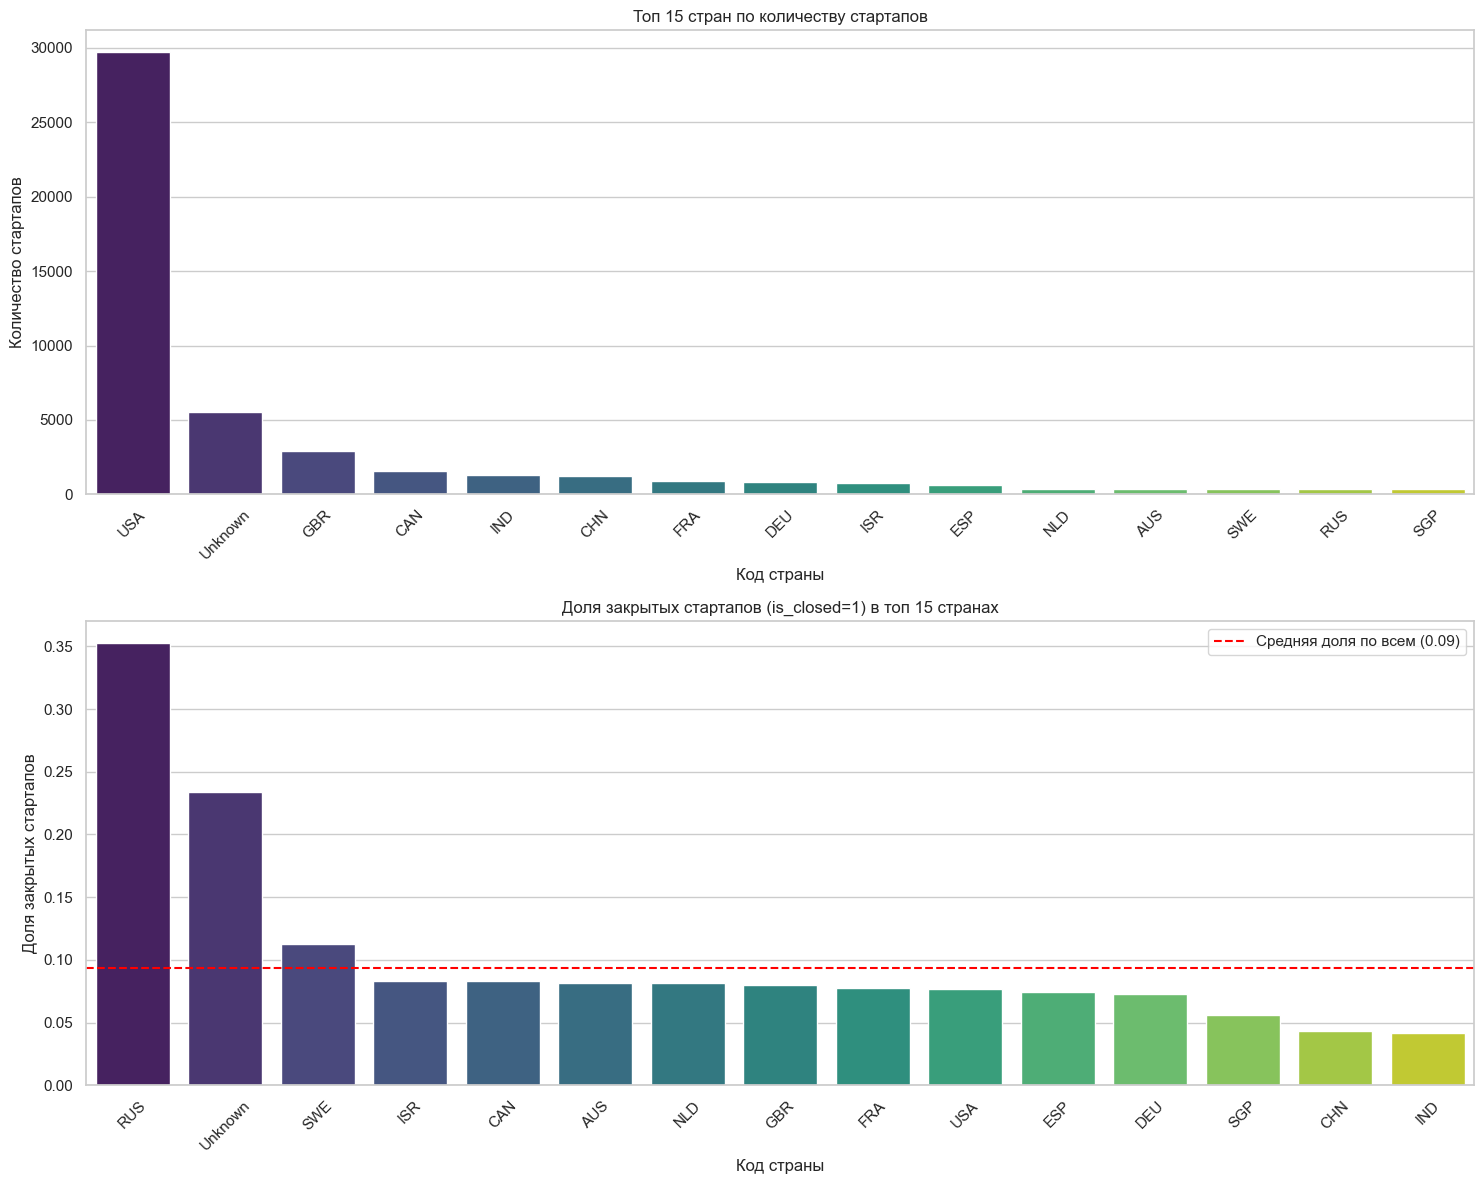


Топ-15 стран и доля закрытых стартапов:
country_code
RUS        0.352304
Unknown    0.233733
SWE        0.112601
ISR        0.083442
CAN        0.083117
AUS        0.081794
NLD        0.081579
GBR        0.080000
FRA        0.077511
USA        0.076866
ESP        0.074135
DEU        0.073141
SGP        0.056180
CHN        0.043548
IND        0.041536
Name: is_closed, dtype: float64

Для страны 'Unknown':
  Количество стартапов: 5502
  Доля закрытых: 0.234


In [15]:
# --- Настройки ---
N_TOP = 15 # Количество топ-категорий для отображения
plt.figure(figsize=(15, 12)) # Общий размер фигуры для двух графиков

# 1. Распределение топ N стран
plt.subplot(2, 1, 1) # Верхний график
top_countries = train_data['country_code'].value_counts().nlargest(N_TOP).index
sns.countplot(data=train_data[train_data['country_code'].isin(top_countries)],
              x='country_code',
              order=top_countries,
              palette='viridis')
plt.title(f'Топ {N_TOP} стран по количеству стартапов')
plt.xlabel('Код страны')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=45)

# 2. Доля закрытых стартапов (is_closed=1) по топ N странам
plt.subplot(2, 1, 2) # Нижний график
# Рассчитываем долю закрытых для каждой страны из топ N
country_status_ratio = train_data[train_data['country_code'].isin(top_countries)].groupby('country_code')['is_closed'].mean().sort_values(ascending=False)
sns.barplot(x=country_status_ratio.index, y=country_status_ratio.values, palette='viridis')
plt.title(f'Доля закрытых стартапов (is_closed=1) в топ {N_TOP} странах')
plt.xlabel('Код страны')
plt.ylabel('Доля закрытых стартапов')
plt.xticks(rotation=45)
plt.axhline(train_data['is_closed'].mean(), color='red', linestyle='--', label=f'Средняя доля по всем ({train_data["is_closed"].mean():.2f})')
plt.legend()

plt.tight_layout() # Чтобы графики не накладывались
plt.show()

# Выведем также топ 5 стран и их долю закрытых стартапов
print(f"\nТоп-{N_TOP} стран и доля закрытых стартапов:")
print(country_status_ratio)

# Посмотрим на страну 'Unknown', если она есть
if 'Unknown' in train_data['country_code'].unique():
    unknown_ratio = train_data[train_data['country_code'] == 'Unknown']['is_closed'].mean()
    unknown_count = (train_data['country_code'] == 'Unknown').sum()
    print(f"\nДля страны 'Unknown':")
    print(f"  Количество стартапов: {unknown_count}")
    print(f"  Доля закрытых: {unknown_ratio:.3f}")

**Общие выводы по country_code:**

- Признак определенно **имеет предсказательную силу**. Различия в доле закрытых стартапов между странами (особенно RUS, Unknown и остальными) заметны.

- **Концентрация в США**: Подавляющее большинство данных относится к США.

- Важность 'Unknown': Отсутствие данных о стране - важный фактор риска.

- **Проблема кардинальности**: 135 уникальных стран - многовато для простого One-Hot Encoding. Понадобятся более хитрые методы кодирования (например, Target Encoding, Frequency Encoding, или группировка редких стран в категорию 'Other').

### Анализ state_code

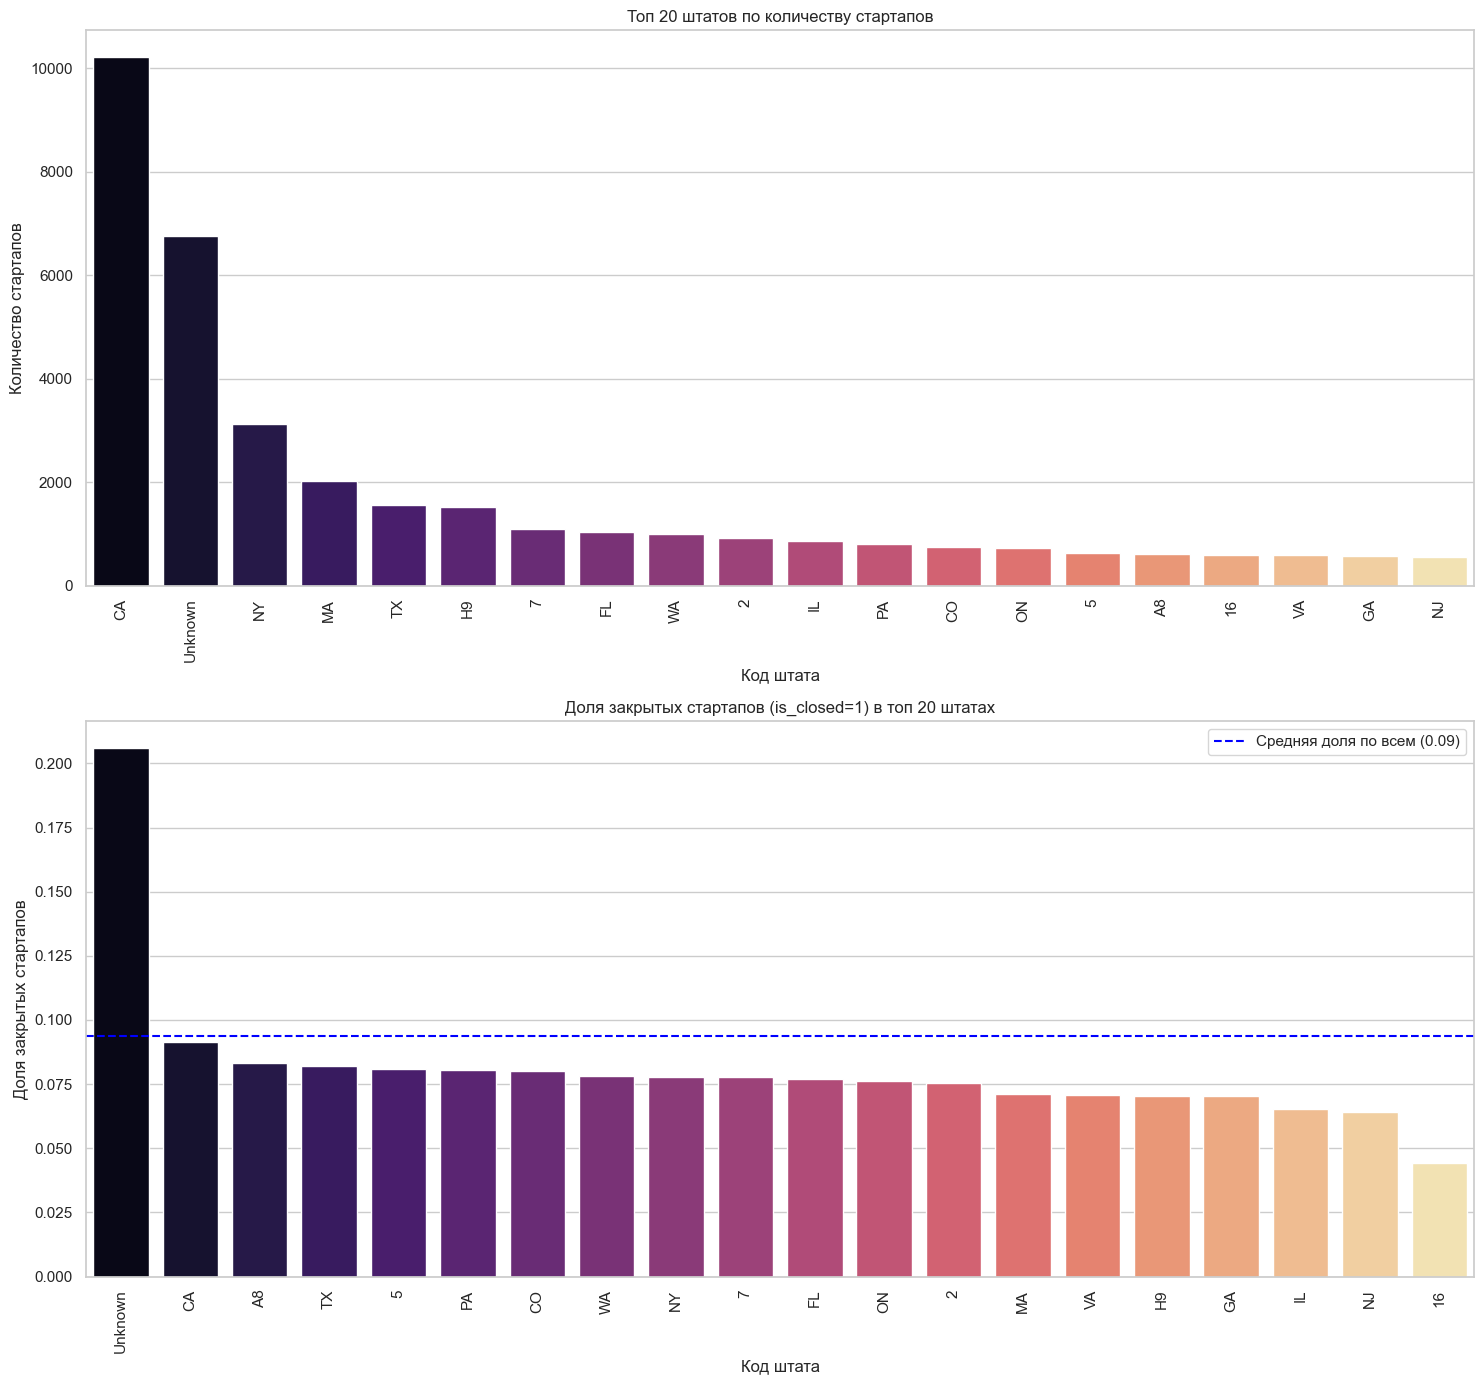


Топ-20 штатов и доля закрытых стартапов:
state_code
Unknown    0.206122
CA         0.091594
A8         0.083195
TX         0.081946
5          0.080952
PA         0.080503
CO         0.080272
WA         0.078235
NY         0.077763
7          0.077626
FL         0.077071
ON         0.076283
2          0.075575
MA         0.071287
VA         0.070568
H9         0.070199
GA         0.070175
IL         0.065192
NJ         0.064286
16         0.044068
Name: is_closed, dtype: float64

Для штата 'Unknown':
  Количество стартапов: 6763
  Доля закрытых: 0.206


In [16]:
# --- Анализ state_code ---
N_TOP_STATES = 20 # Возьмем побольше, так как их больше
plt.figure(figsize=(15, 14))

# 1. Распределение топ N штатов
plt.subplot(2, 1, 1)
top_states = train_data['state_code'].value_counts().nlargest(N_TOP_STATES).index
# Фильтруем данные, чтобы включить только топ штаты
sns.countplot(data=train_data[train_data['state_code'].isin(top_states)],
              x='state_code',
              order=top_states,
              palette='magma') # Другая палитра для разнообразия
plt.title(f'Топ {N_TOP_STATES} штатов по количеству стартапов')
plt.xlabel('Код штата')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=90) # Повернем на 90 градусов, может быть много штатов

# 2. Доля закрытых стартапов по топ N штатам
plt.subplot(2, 1, 2)
state_status_ratio = train_data[train_data['state_code'].isin(top_states)].groupby('state_code')['is_closed'].mean().sort_values(ascending=False)
sns.barplot(x=state_status_ratio.index, y=state_status_ratio.values, palette='magma')
plt.title(f'Доля закрытых стартапов (is_closed=1) в топ {N_TOP_STATES} штатах')
plt.xlabel('Код штата')
plt.ylabel('Доля закрытых стартапов')
plt.xticks(rotation=90)
plt.axhline(train_data['is_closed'].mean(), color='blue', linestyle='--', label=f'Средняя доля по всем ({train_data["is_closed"].mean():.2f})')
plt.legend()

plt.tight_layout()
plt.show()

# Выведем также топ штаты и их долю закрытых стартапов
print(f"\nТоп-{N_TOP_STATES} штатов и доля закрытых стартапов:")
print(state_status_ratio)

# Посмотрим на штат 'Unknown', если он есть
if 'Unknown' in train_data['state_code'].unique():
    unknown_state_ratio = train_data[train_data['state_code'] == 'Unknown']['is_closed'].mean()
    unknown_state_count = (train_data['state_code'] == 'Unknown').sum()
    print(f"\nДля штата 'Unknown':")
    print(f"  Количество стартапов: {unknown_state_count}")
    print(f"  Доля закрытых: {unknown_state_ratio:.3f}")

**Общие выводы по state_code**:

- Признак тоже **выглядит полезным**, в основном за счет сильного сигнала от категории Unknown. Различия между реальными штатами менее выражены, чем между странами, но они есть.

- Обнаружена **проблема с качеством данных** в виде нестандартных кодов.

- Сильная **связь** с country_code (большинство топ-штатов из США).

- **Высокая кардинальность** (301) и сильная концентрация потребуют продуманного кодирования (группировка редких/странных, Target/Frequency Encoding).

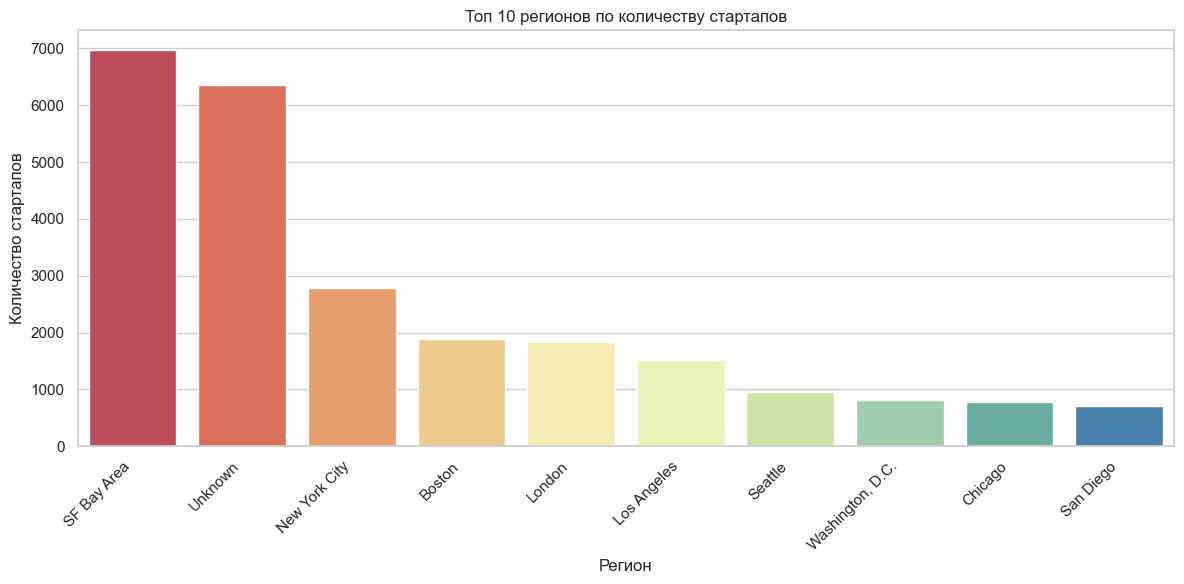


Доля закрытых стартапов в топ-10 регионах:
region
Unknown             0.214971
Los Angeles         0.094514
SF Bay Area         0.091535
Seattle             0.080628
San Diego           0.079659
New York City       0.079251
London              0.071196
Washington, D.C.    0.070991
Boston              0.068254
Chicago             0.057841
Name: is_closed, dtype: float64

Для региона 'Unknown':
  Количество стартапов: 6359
  Доля закрытых: 0.215


In [17]:
# --- Анализ region ---
N_TOP_REGIONS = 10
plt.figure(figsize=(12, 6))

top_regions = train_data['region'].value_counts().nlargest(N_TOP_REGIONS).index
sns.countplot(data=train_data[train_data['region'].isin(top_regions)],
              x='region',
              order=top_regions,
              palette='Spectral')
plt.title(f'Топ {N_TOP_REGIONS} регионов по количеству стартапов')
plt.xlabel('Регион')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=45, ha='right') # ha='right' для лучшего выравнивания
plt.tight_layout()
plt.show()

# Посмотрим долю закрытых для топ-10 и для 'Unknown'
region_status_ratio_top10 = train_data[train_data['region'].isin(top_regions)].groupby('region')['is_closed'].mean().sort_values(ascending=False)
print(f"\nДоля закрытых стартапов в топ-{N_TOP_REGIONS} регионах:")
print(region_status_ratio_top10)

if 'Unknown' in train_data['region'].unique():
   unknown_region_ratio = train_data[train_data['region'] == 'Unknown']['is_closed'].mean()
   unknown_region_count = (train_data['region'] == 'Unknown').sum()
   print(f"\nДля региона 'Unknown':")
   print(f"  Количество стартапов: {unknown_region_count}")
   print(f"  Доля закрытых: {unknown_region_ratio:.3f}")

**Общие выводы по region:**

- Признак region тоже несет полезную информацию, в первую очередь из-за категории **Unknown**.

- Среди известных регионов (в основном крупных городов/агломераций) есть некоторая вариативность в доле закрытия, но она не такая резкая, как между странами (за исключением 'Unknown').

- Данные сильно сконцентрированы, а уникальных значений очень много (1037). Это делает прямое кодирование невозможным.ожным.

### Временные признаки

**Проверка типов данных**

In [18]:
print("Типы данных столбцов с датами в train_data:")
print(train_data[['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']].dtypes)

print("\nТипы данных столбцов с датами в test_data:")
# В test_data нет closed_at и founded_at по исходным данным, проверим те, что есть
date_cols_test = [col for col in ['founded_at', 'first_funding_at', 'last_funding_at'] if col in test_data.columns]
if date_cols_test:
    print(test_data[date_cols_test].dtypes)
else:
    print("В test_data нет столбцов founded_at, first_funding_at, last_funding_at.")

# Также убедимся, что NaT присутствуют там, где нужно в closed_at
print(f"\nКоличество не-NaT в 'closed_at' (должно быть равно числу closed): {train_data['closed_at'].notna().sum()}")
print(f"Количество NaT в 'closed_at' (должно быть равно числу operating): {train_data['closed_at'].isna().sum()}")

# Определим дату среза данных
snapshot_date = pd.to_datetime('2018-01-01')
print(f"\nДата среза данных (snapshot_date): {snapshot_date}")

Типы данных столбцов с датами в train_data:
founded_at          datetime64[ns]
first_funding_at    datetime64[ns]
last_funding_at     datetime64[ns]
closed_at           datetime64[ns]
dtype: object

Типы данных столбцов с датами в test_data:
first_funding_at    datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object

Количество не-NaT в 'closed_at' (должно быть равно числу closed): 4916
Количество NaT в 'closed_at' (должно быть равно числу operating): 47599

Дата среза данных (snapshot_date): 2018-01-01 00:00:00


### Извлечение признаков из дат

Извлечем год, месяц и день недели из основных дат. Год основания может быть особенно важен.

In [19]:
# --- Признаки из founded_at ---
train_data['founded_year'] = train_data['founded_at'].dt.year
train_data['founded_month'] = train_data['founded_at'].dt.month
train_data['founded_dayofweek'] = train_data['founded_at'].dt.dayofweek # Понедельник=0, Воскресенье=6

# --- Признаки из first_funding_at ---
train_data['first_funding_year'] = train_data['first_funding_at'].dt.year
# test_data['first_funding_year'] = test_data['first_funding_at'].dt.year # Добавим и для test

# --- Признаки из last_funding_at ---
train_data['last_funding_year'] = train_data['last_funding_at'].dt.year
# test_data['last_funding_year'] = test_data['last_funding_at'].dt.year # Добавим и для test

# --- Признаки из closed_at (только для закрытых, может быть менее полезно) ---
# train_data['closed_year'] = train_data['closed_at'].dt.year # Пока не будем добавлять, много NaN

# Применим к test_data (если столбцы существуют)
if 'founded_at' in test_data.columns:
    test_data['founded_year'] = test_data['founded_at'].dt.year
    test_data['founded_month'] = test_data['founded_at'].dt.month
    test_data['founded_dayofweek'] = test_data['founded_at'].dt.dayofweek
else: # Если founded_at нет в тесте, но есть в трейне, нужно что-то решить
      # Например, заполнить медианным годом из трейна или создать фиктивный признак
      print("Столбец 'founded_at' отсутствует в test_data, соответствующие признаки не созданы.")


if 'first_funding_at' in test_data.columns:
     test_data['first_funding_year'] = test_data['first_funding_at'].dt.year
if 'last_funding_at' in test_data.columns:
    test_data['last_funding_year'] = test_data['last_funding_at'].dt.year


print("\nСозданы признаки года, месяца, дня недели.")
print(train_data[['founded_year', 'founded_month', 'founded_dayofweek', 'first_funding_year', 'last_funding_year']].head())

Столбец 'founded_at' отсутствует в test_data, соответствующие признаки не созданы.

Созданы признаки года, месяца, дня недели.
   founded_year  founded_month  founded_dayofweek  first_funding_year  \
0          2009             10                  5                2011   
1          2005              1                  5                2010   
2          2006              1                  6                2012   
3          2004              1                  3                2011   
4          2010              5                  2                2012   

   last_funding_year  
0               2014  
1               2014  
2               2014  
3               2014  
4               2012  


**Вычисление временных интервалов**

- lifetime (уже создан, но включим его в анализ)

- time_to_first_funding: Время от основания до первого финансирования.

- funding_duration: Время между первым и последним раундом финансирования.ния.я.

In [20]:
# --- Время до первого финансирования ---
train_data['time_to_first_funding'] = (train_data['first_funding_at'] - train_data['founded_at']).dt.days
# Обработаем случаи, когда first_funding_at < founded_at (ошибки данных) или NaN
train_data['time_to_first_funding'] = train_data['time_to_first_funding'].apply(lambda x: max(0, x) if pd.notna(x) else -1) # Отрицательные -> 0, NaN -> -1 (или другое значение)

# --- Длительность периода финансирования ---
train_data['funding_duration'] = (train_data['last_funding_at'] - train_data['first_funding_at']).dt.days
# Обработаем случаи, когда last_funding_at < first_funding_at или NaN
train_data['funding_duration'] = train_data['funding_duration'].apply(lambda x: max(0, x) if pd.notna(x) else -1) # Отрицательные -> 0, NaN -> -1

# --- Применим к test_data (где возможно) ---
# time_to_first_funding требует founded_at, которого нет в тесте
print("Признак 'time_to_first_funding' не может быть создан для test_data из-за отсутствия 'founded_at'.")

if 'last_funding_at' in test_data.columns and 'first_funding_at' in test_data.columns:
    test_data['funding_duration'] = (test_data['last_funding_at'] - test_data['first_funding_at']).dt.days
    test_data['funding_duration'] = test_data['funding_duration'].apply(lambda x: max(0, x) if pd.notna(x) else -1)
else:
    print("Признак 'funding_duration' не может быть создан для test_data из-за отсутствия нужных столбцов.")


print("\nСозданы признаки длительности:")
print(train_data[['lifetime', 'time_to_first_funding', 'funding_duration']].head())
print(train_data[['lifetime', 'time_to_first_funding', 'funding_duration']].describe())

Признак 'time_to_first_funding' не может быть создан для test_data из-за отсутствия 'founded_at'.

Созданы признаки длительности:
   lifetime  time_to_first_funding  funding_duration
0    2998.0                    561              1310
1    4748.0                   1949              1393
2    4383.0                   2423               681
3    5114.0                   2800              1051
4    2791.0                    630                 0
           lifetime  time_to_first_funding  funding_duration
count  52515.000000           52515.000000      52515.000000
mean    3140.876302            1000.865924        346.495592
std     2147.813148            1633.803790        688.609285
min       19.000000               0.000000          0.000000
25%     1739.000000             214.000000          0.000000
50%     2557.000000             480.000000          0.000000
75%     4018.000000             976.000000        427.000000
max    17378.000000           16313.000000      10807.000000


Анализ новых временных признаков.
Теперь посмотрим на распределение некоторых новых признаков и их связь со статусом.

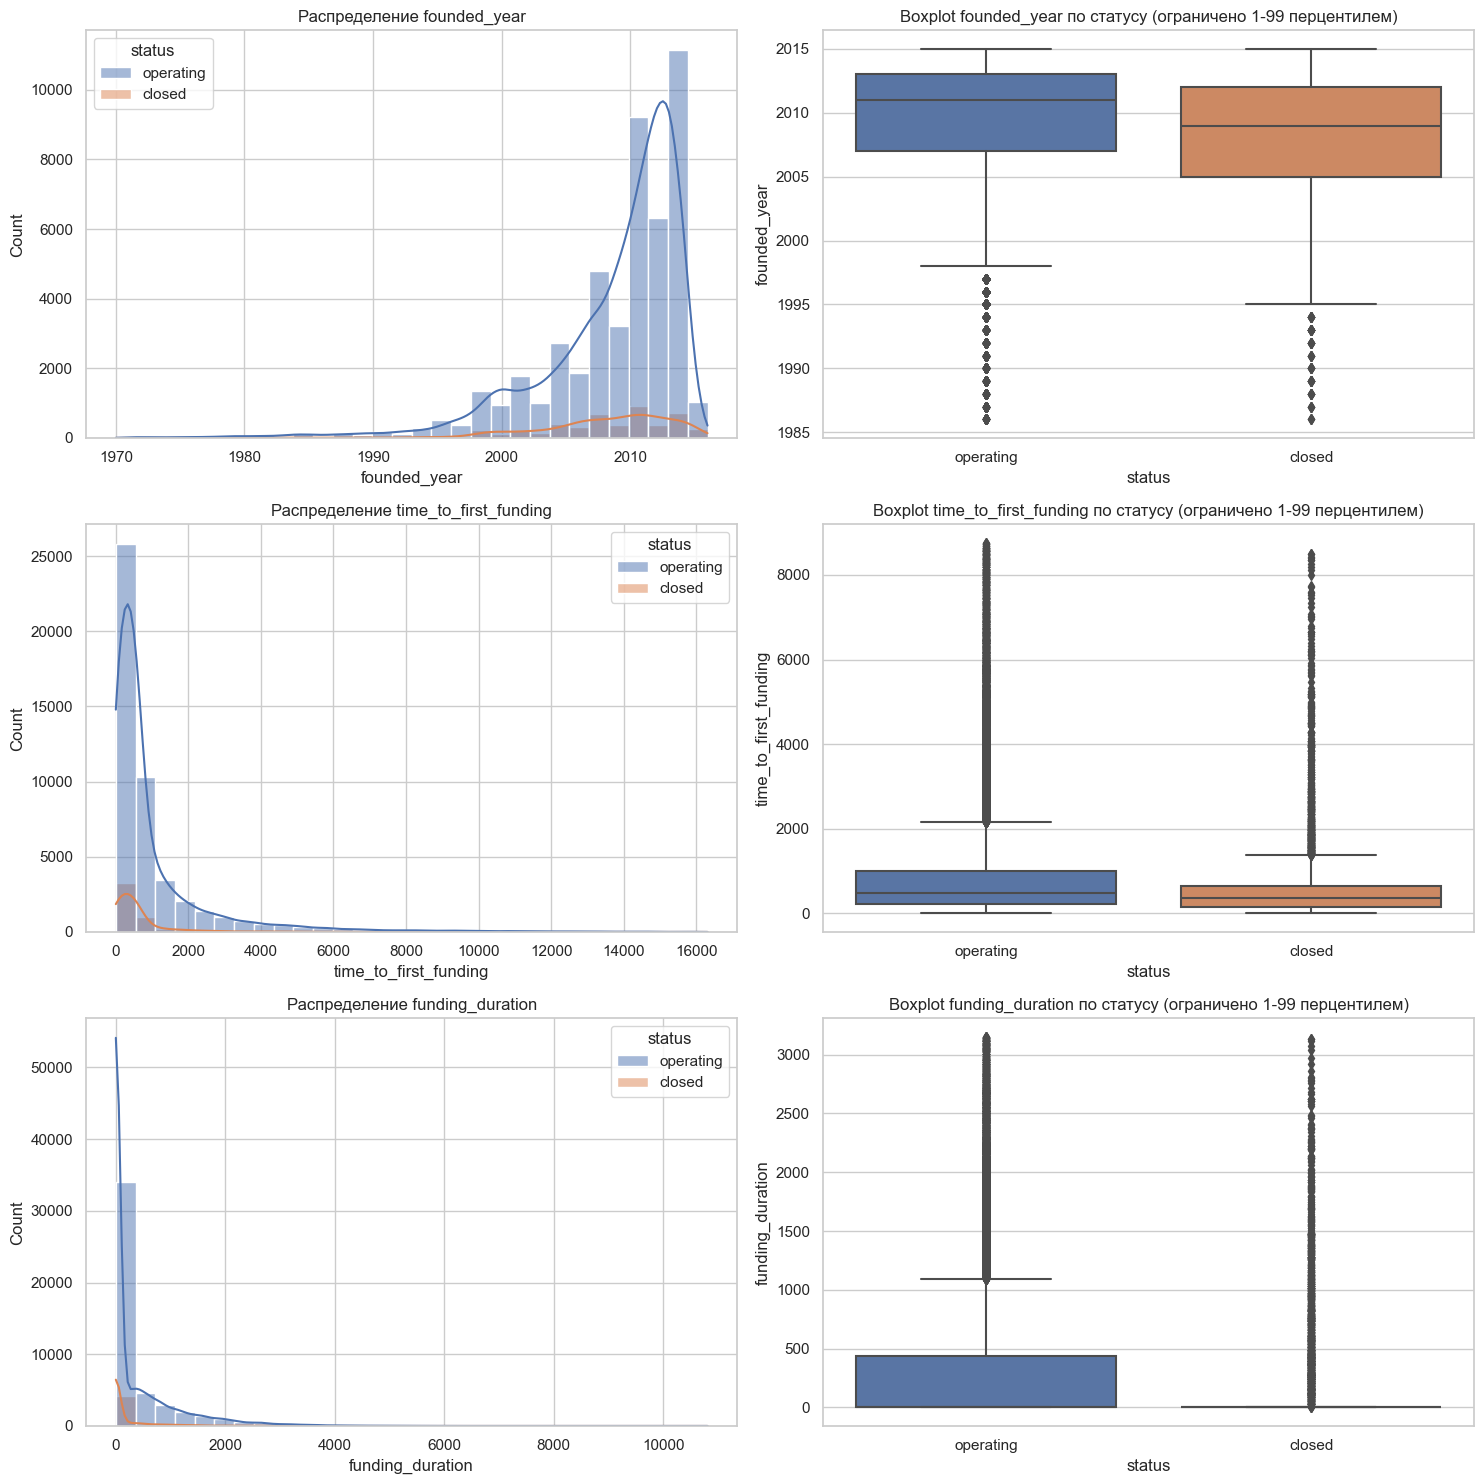


Корреляция новых временных признаков с is_closed:
is_closed                1.000000
founded_month            0.045928
founded_dayofweek       -0.001944
founded_year            -0.038056
time_to_first_funding   -0.061387
funding_duration        -0.076952
first_funding_year      -0.129188
last_funding_year       -0.182709
lifetime                -0.260573
Name: is_closed, dtype: float64


In [21]:
# Список новых числовых признаков для анализа (выберите самые интересные)
new_temporal_features = ['founded_year', 'time_to_first_funding', 'funding_duration']

plt.figure(figsize=(15, len(new_temporal_features) * 5))

for i, feature in enumerate(new_temporal_features):
    if feature not in train_data.columns:
        print(f"Признак {feature} не найден в train_data, пропускаем.")
        continue

    # Гистограмма/KDE
    plt.subplot(len(new_temporal_features), 2, 2*i + 1)
    sns.histplot(data=train_data, x=feature, hue='status', kde=True, bins=30)
    plt.title(f'Распределение {feature}')

    # Boxplot
    plt.subplot(len(new_temporal_features), 2, 2*i + 2)
    # Ограничим выбросы для наглядности boxplot'а, если нужно
    q_low = train_data[feature].quantile(0.01)
    q_high = train_data[feature].quantile(0.99)
    filtered_data = train_data[(train_data[feature] >= q_low) & (train_data[feature] <= q_high)]
    if not filtered_data.empty:
         sns.boxplot(data=filtered_data, y=feature, x='status')
    else: # Если фильтрация удалила все данные (маловероятно)
         sns.boxplot(data=train_data, y=feature, x='status')
    plt.title(f'Boxplot {feature} по статусу (ограничено 1-99 перцентилем)')


plt.tight_layout()
plt.show()

# Дополнительно посмотрим корреляцию новых признаков с is_closed
print("\nКорреляция новых временных признаков с is_closed:")
temporal_corr_cols = new_temporal_features + ['lifetime', 'founded_month', 'founded_dayofweek', 'first_funding_year', 'last_funding_year']
# Уберем те, которых нет в датафрейме
temporal_corr_cols = [col for col in temporal_corr_cols if col in train_data.columns] + ['is_closed']

if len(temporal_corr_cols) > 1:
    print(train_data[temporal_corr_cols].corr()['is_closed'].sort_values(ascending=False))
else:
    print("Недостаточно временных признаков для расчета корреляции.")

### Анализ графиков и корреляций

---
**founded_year**

- **Графики:**  
  Большинство стартапов основано после 2000 года, с пиком примерно в 2010–2013 гг. Распределение закрытых (closed) стартапов немного смещено влево (основаны чуть раньше), чем у действующих (operating). Медианный год основания у closed ниже.

- **Корреляция (-0.038):**  
  Очень слабая отрицательная корреляция с `is_closed`.

- **Вывод:**  
  Есть небольшая тенденция, что более старые компании чаще закрыты, но эффект слабый. Главное: признак бесполезен для модели из-за отсутствия в test_data.

---

**time_to_first_funding**

- **Графики:**  
  Очень скошенное распределение. Большинство получают финансирование быстро. У closed медиана времени до первого финансирования ниже, чем у operating.

- **Корреляция (-0.061):**  
  Слабая отрицательная корреляция.

- **Вывод:**  
  Стартапы, которые закрылись, в среднем получали первое финансирование чуть быстрее. Но связь слабая. Главное: признак бесполезен для модели из-за отсутствия в test_data.

---

**funding_duration**

- **Графики:**  
  Сильно скошено, у большинства значение 0 (один раунд или первый = последний). У operating стартапов хвост распределения гораздо длиннее (продолжают привлекать раунды дольше). Медиана 0 для обеих групп, но верхний квартиль и выбросы у operating гораздо выше.

- **Корреляция (-0.077):**  
  Слабая отрицательная корреляция.

- **Вывод:**  
  Более длительный период привлечения финансирования характерен для действующих компаний. Признак можно использовать, так как он есть в обоих наборах.

---

**Другие корреляции**

| Признак              | Корреляция | Комментарий                                                                                  |
|----------------------|------------|---------------------------------------------------------------------------------------------|
| **lifetime**         | -0.261     | Самый сильный из временных предикторов. Можно использовать.                                 |
| **last_funding_year**| -0.183     | Умеренная отрицательная корреляция. Чем свежее последний раунд, тем меньше шанс быть закрытым. Можно использовать. |
| **first_funding_year**| -0.129    | Отрицательная корреляция, но слабее, чем у last_funding_year. Можно использовать.           |
| **founded_month, founded_dayofweek** | ~0       | Корреляции почти нулевые, пользы мало, и они недоступны для test_data.                      |
едоступны для test_data.                      |


**Что делать с признаками train/test?**

Признаки founded_year, founded_month, founded_dayofweek, time_to_first_funding необходимо будет исключить из набора данных перед обучением модели. Мы не можем использовать признаки, которые отсутствуют в тестовом наборе, на котором нужно делать предсказания.

### Финализация Очистки и Feature Engineering

На этом этапе подводим итоги очистки и применяем финальные преобразования к числовым признакам.

1. Применяем логарифмирование к funding_total_usd: Лучший способ справиться с выбросами и скошенностью.
2.   Удаляем непригодные для использования признаки: Те, что были созданы на основе founded_at, так как этой колонки нет в test_data. Также удалим исходные колонки дат, так как вся нужная информация извлечена в новые признак
3.     Проверяем пропуски: Убедимся, что после всех манипуляций не осталось нежелательных пропусков.

In [22]:
# 1. Применяем log1p к funding_total_usd
print("Применение log1p к 'funding_total_usd'...")
# Проверим наличие столбца перед преобразованием
if 'funding_total_usd' in train_data.columns:
    train_data['funding_total_usd'] = np.log1p(train_data['funding_total_usd'])
    print("Log1p применен к train_data['funding_total_usd']")
else:
    print("Столбец 'funding_total_usd' не найден в train_data.")

if 'funding_total_usd' in test_data.columns:
    test_data['funding_total_usd'] = np.log1p(test_data['funding_total_usd'])
    print("Log1p применен к test_data['funding_total_usd']")
else:
    print("Столбец 'funding_total_usd' не найден в test_data.")


# 2. Определяем и удаляем непригодные и исходные колонки
features_to_drop = [
    # Непригодные из-за отсутствия в test_data:
    'founded_year', 'founded_month', 'founded_dayofweek', 'time_to_first_funding',
    # Исходные колонки дат (информация извлечена):
    'founded_at', 'first_funding_at', 'last_funding_at', 'closed_at',
    # Возможно, стоит удалить и 'name', если он не используется как индекс
    'name'
]

# Удаляем столбцы, только если они существуют
existing_cols_to_drop_train = [col for col in features_to_drop if col in train_data.columns]
if existing_cols_to_drop_train:
    print(f"\nУдаление столбцов из train_data: {existing_cols_to_drop_train}")
    train_data = train_data.drop(columns=existing_cols_to_drop_train)
else:
    print("\nНет столбцов для удаления из train_data из списка.")

existing_cols_to_drop_test = [col for col in features_to_drop if col in test_data.columns]
if existing_cols_to_drop_test:
    print(f"\nУдаление столбцов из test_data: {existing_cols_to_drop_test}")
    test_data = test_data.drop(columns=existing_cols_to_drop_test)
else:
    print("\nНет столбцов для удаления из test_data из списка.")


# 3. Финальная проверка на пропуски (кроме status в test_data)
print("\nПроверка пропусков в train_data:")
print(train_data.isnull().sum().sort_values(ascending=False))

print("\nПроверка пропусков в test_data:")
print(test_data.isnull().sum().sort_values(ascending=False))

# 4. Проверка оставшихся колонок
print("\nОставшиеся колонки в train_data:")
print(train_data.columns)
print("\nОставшиеся колонки в test_data:")
print(test_data.columns)

Применение log1p к 'funding_total_usd'...
Log1p применен к train_data['funding_total_usd']
Log1p применен к test_data['funding_total_usd']

Удаление столбцов из train_data: ['founded_year', 'founded_month', 'founded_dayofweek', 'time_to_first_funding', 'founded_at', 'first_funding_at', 'last_funding_at', 'closed_at', 'name']

Удаление столбцов из test_data: ['first_funding_at', 'last_funding_at', 'name']

Проверка пропусков в train_data:
category_list         0
funding_total_usd     0
status                0
country_code          0
state_code            0
region                0
city                  0
funding_rounds        0
missing_geo           0
is_closed             0
lifetime              0
first_funding_year    0
last_funding_year     0
funding_duration      0
dtype: int64

Проверка пропусков в test_data:
category_list         0
funding_total_usd     0
country_code          0
state_code            0
region                0
city                  0
funding_rounds        0
lifetime

## Моделирование и Оценка

### Кодирование категориальных признаков

Это ключевой этап подготовки данных для модели. Будем кодировать category_list, country_code, state_code, region, city.

1. Обработаем category_list: Создадим признаки "количество категорий" и "первая категория", затем применим частотное кодирование к первой категории.

2. Применим частотное кодирование к остальным географическим признакам.

In [23]:
# --- 1. Обработка 'category_list' ---
print("Обработка 'category_list'...")
# Создаем количество категорий
train_data['num_categories'] = train_data['category_list'].apply(lambda x: len(x.split('|')) if x != 'Unknown' else 0)
test_data['num_categories'] = test_data['category_list'].apply(lambda x: len(x.split('|')) if x != 'Unknown' else 0)

# Создаем первую категорию
train_data['first_category'] = train_data['category_list'].apply(lambda x: x.split('|')[0] if x != 'Unknown' else 'Unknown')
test_data['first_category'] = test_data['category_list'].apply(lambda x: x.split('|')[0] if x != 'Unknown' else 'Unknown')

# Удаляем исходный category_list
print("Удаление 'category_list'...")
train_data = train_data.drop(columns=['category_list'])
test_data = test_data.drop(columns=['category_list'])

# --- 2. Частотное кодирование (Frequency Encoding) ---
# Список категориальных признаков для кодирования (включая созданный first_category)
categorical_cols_to_encode = ['first_category', 'country_code', 'state_code', 'region', 'city']

print(f"Применение частотного кодирования к: {categorical_cols_to_encode}")

for col in categorical_cols_to_encode:
    if col not in train_data.columns:
        print(f"Столбец {col} не найден, пропуск кодирования.")
        continue

    # Рассчитываем частоты ТОЛЬКО на обучающих данных
    freq_map = train_data[col].value_counts(normalize=True) # normalize=True дает долю

    # Применяем к train и test
    train_data[col + '_freq'] = train_data[col].map(freq_map).fillna(0) # fillna(0) для категорий, которых нет в тесте
    test_data[col + '_freq'] = test_data[col].map(freq_map).fillna(0) # fillna(0) для категорий из теста, которых не было в трейне

    # Удаляем исходные категориальные столбцы
    train_data = train_data.drop(columns=[col])
    if col in test_data.columns: # Проверяем наличие в тесте перед удалением
         test_data = test_data.drop(columns=[col])

print("\nКатегориальные признаки закодированы частотным методом.")
print("Новые колонки с суффиксом '_freq' созданы.")

# Проверяем результат
print("\nОставшиеся колонки в train_data после кодирования:")
print(train_data.columns)
print("\nОставшиеся колонки в test_data после кодирования:")
print(test_data.columns)
print("\nТипы данных train_data:")
print(train_data.info())

Обработка 'category_list'...
Удаление 'category_list'...
Применение частотного кодирования к: ['first_category', 'country_code', 'state_code', 'region', 'city']

Категориальные признаки закодированы частотным методом.
Новые колонки с суффиксом '_freq' созданы.

Оставшиеся колонки в train_data после кодирования:
Index(['funding_total_usd', 'status', 'funding_rounds', 'missing_geo',
       'is_closed', 'lifetime', 'first_funding_year', 'last_funding_year',
       'funding_duration', 'num_categories', 'first_category_freq',
       'country_code_freq', 'state_code_freq', 'region_freq', 'city_freq'],
      dtype='object')

Оставшиеся колонки в test_data после кодирования:
Index(['funding_total_usd', 'funding_rounds', 'lifetime', 'missing_geo',
       'first_funding_year', 'last_funding_year', 'funding_duration',
       'num_categories', 'first_category_freq', 'country_code_freq',
       'state_code_freq', 'region_freq', 'city_freq'],
      dtype='object')

Типы данных train_data:
<class 'pa

### Масштабирование признаков (Feature Scaling)

Последний шаг подготовки перед моделированием. Масштабируем все числовые признаки.
1. Определяем числовые признаки, которые нужно масштабировать (все, кроме целевой переменной status и бинарных флагов is_closed, missing_geo).

2. Применяем StandardScaler.

In [24]:
# 1. Определяем колонки для масштабирования
# Исключаем целевую переменную ('status') и бинарные признаки
cols_to_scale = [col for col in train_data.columns if col not in ['status', 'is_closed', 'missing_geo']]
# Убедимся, что все эти колонки есть и в test_data (должны быть, кроме status)
cols_to_scale_test = [col for col in cols_to_scale if col in test_data.columns]

# Сравним списки на всякий случай
if set(cols_to_scale) - {'status'} != set(cols_to_scale_test):
     print("ВНИМАНИЕ: Наборы колонок для масштабирования в train и test не совпадают!")
     print("Train:", set(cols_to_scale) - {'status'})
     print("Test:", set(cols_to_scale_test))
     # Возможно, нужно будет скорректировать cols_to_scale или cols_to_scale_test

print(f"Колонки для масштабирования ({len(cols_to_scale)}): {cols_to_scale}")
print(f"Колонки для масштабирования в тесте ({len(cols_to_scale_test)}): {cols_to_scale_test}")


# 2. Создаем и применяем StandardScaler
scaler = StandardScaler()

# Обучаем ТОЛЬКО на train_data и применяем к нему
print("Применение StandardScaler к train_data...")
# Убедимся, что колонка 'status' существует перед её исключением
if 'status' in cols_to_scale:
    train_features_to_scale = train_data[[col for col in cols_to_scale if col != 'status']]
    train_data[[col for col in cols_to_scale if col != 'status']] = scaler.fit_transform(train_features_to_scale)
else: # Если status уже удален или не был в списке
    train_features_to_scale = train_data[cols_to_scale]
    train_data[cols_to_scale] = scaler.fit_transform(train_features_to_scale)


# Применяем обученный scaler к test_data
print("Применение StandardScaler к test_data...")
if cols_to_scale_test: # Проверяем, что есть что масштабировать в тесте
    test_features_to_scale = test_data[cols_to_scale_test]
    test_data[cols_to_scale_test] = scaler.transform(test_features_to_scale)
else:
    print("Нет колонок для масштабирования в test_data.")

print("\nМасштабирование завершено.")

# Финальный взгляд на данные
print("\nПервые 5 строк train_data после масштабирования:")
print(train_data.head())
print("\nПервые 5 строк test_data после масштабирования:")
print(test_data.head())
print("\nРазмер train_data:", train_data.shape)
print("\nРазмер test_data:", test_data.shape)

Колонки для масштабирования (12): ['funding_total_usd', 'funding_rounds', 'lifetime', 'first_funding_year', 'last_funding_year', 'funding_duration', 'num_categories', 'first_category_freq', 'country_code_freq', 'state_code_freq', 'region_freq', 'city_freq']
Колонки для масштабирования в тесте (12): ['funding_total_usd', 'funding_rounds', 'lifetime', 'first_funding_year', 'last_funding_year', 'funding_duration', 'num_categories', 'first_category_freq', 'country_code_freq', 'state_code_freq', 'region_freq', 'city_freq']
Применение StandardScaler к train_data...
Применение StandardScaler к test_data...

Масштабирование завершено.

Первые 5 строк train_data после масштабирования:
   funding_total_usd     status  funding_rounds  missing_geo  is_closed  \
0          -0.356096  operating        0.188660            0          0   
1           1.476654  operating        1.643715            0          0   
2           1.387802  operating        0.916187            0          0   
3           1.1

Резюмируем финальное состояние данных:

1. **Очистка**: Пропуски обработаны (либо заполнены, либо информация о них сохранена в missing_geo), выбросы в funding_total_usd сглажены логарифмированием.


2. **Feature Engineering**: Извлечены полезные признаки из дат (lifetime, *_year, funding_duration) и категорий (num_categories, first_category). Признаки, недоступные для test_data, удалены.


3. **Кодирование**: Все категориальные признаки (first_category, country_code, state_code, region, city) преобразованы в числовой формат с помощью частотного кодирования (созданы столбцы *_freq).


4. **Масштабирование**: Все числовые признаки (кроме бинарных флагов is_closed, missing_geo и целевой status) приведены к единому масштабу с помощью StandardScaler.


5. **Размерности**:

    - train_data: 52515 строк, 15 столбцов (13 признаков + is_closed + status).

    - test_data: 13125 строк, 13 столбцов (те же 13 признаков, что и в train).
    - Все совпадает, отлично!


6. **Типы данных**: Все признаки числовые, кроме целевой переменной status, которая осталась типом object для последующего использования в качестве метки класса.ве метки класса.

### Выбор модели, разделение данных и базовая модель (Baseline)

**Цель**: Разделить данные на обучающую и валидационную выборки и обучить простую модель, чтобы получить точку отсчета (baseline) для сравнения более сложных подходов.

- Нам нужно отделить признаки (X) от целевой переменной (y).

- Целевая переменная у нас сейчас status (object) и is_closed (int64). Поскольку is_closed уже в числовом формате (0 для 'operating', 1 для 'closed'), будем использовать её как нашу целевую переменную y. Столбец status можно удалить из train_data.

- X будет содержать все остальные столбцы из train_data.

- X_test будет содержать все столбцы из test_data.est_data.

In [25]:
# 1. Определяем X и y для обучающих данных
if 'status' in train_data.columns:
    print("Удаление столбца 'status' из train_data...")
    train_data = train_data.drop(columns=['status'])
else:
    print("Столбец 'status' уже отсутствует в train_data.")

y = train_data['is_closed']
X = train_data.drop(columns=['is_closed'])

# Определяем X_test (целевой переменной там нет)
X_test = test_data.copy() # Просто копируем готовый test_data

print("\nПроверка и синхронизация колонок X и X_test...")
if list(X.columns) != list(X_test.columns):
    print("Обнаружено несоответствие колонок!")
    print("Колонки X:", list(X.columns))
    print("Колонки X_test (исходные):", list(X_test.columns))

    # Приводим X_test к колонкам X
    missing_in_test = set(X.columns) - set(X_test.columns)
    extra_in_test = set(X_test.columns) - set(X.columns)

    if missing_in_test:
        print(f"ВНИМАНИЕ: В X_test не хватает колонок: {missing_in_test}. Это не должно было произойти. Проверьте предыдущие шаги.")
        # Возможно, придется остановить выполнение и проверить код выше

    if extra_in_test:
        print(f"Удаление лишних колонок из X_test: {extra_in_test}")
        X_test = X_test.drop(columns=list(extra_in_test))

    # Устанавливаем одинаковый порядок колонок
    print("Установка одинакового порядка колонок для X_test...")
    X_test = X_test[X.columns]

    # Финальная проверка
    if list(X.columns) == list(X_test.columns):
        print("Порядок колонок в X и X_test синхронизирован.")
    else:
        print("ОШИБКА: Не удалось синхронизировать колонки!")

else:
    print("Названия и порядок колонок в X и X_test изначально совпадают.")

# Проверка размерностей
print(f"\nРазмер X (признаки для обучения): {X.shape}")
print(f"Размер y (целевая переменная): {y.shape}")
print(f"Размер X_test (признаки для предсказания): {X_test.shape}")

# Проверка названий колонок (должны совпадать в X и X_test)
if list(X.columns) == list(X_test.columns):
    print("\nНазвания и порядок колонок в X и X_test совпадают.")
else:
    print("\nВНИМАНИЕ! Названия или порядок колонок в X и X_test НЕ совпадают!")
    # Нужно будет разобраться, почему это произошло


# 2. Разделение на обучающую и валидационную выборки
# Используем stratify=y для сохранения пропорций классов из-за дисбаланса
# test_size=0.2 означает, что 20% данных пойдет в валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nДанные разделены на обучающую и валидационную выборки:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_val: {y_val.shape}")

# Проверим пропорцию классов в y_train и y_val
print(f"\nПропорция класса 1 (closed) в y_train: {y_train.mean():.4f}")
print(f"Пропорция класса 1 (closed) в y_val:  {y_val.mean():.4f}")

Удаление столбца 'status' из train_data...

Проверка и синхронизация колонок X и X_test...
Обнаружено несоответствие колонок!
Колонки X: ['funding_total_usd', 'funding_rounds', 'missing_geo', 'lifetime', 'first_funding_year', 'last_funding_year', 'funding_duration', 'num_categories', 'first_category_freq', 'country_code_freq', 'state_code_freq', 'region_freq', 'city_freq']
Колонки X_test (исходные): ['funding_total_usd', 'funding_rounds', 'lifetime', 'missing_geo', 'first_funding_year', 'last_funding_year', 'funding_duration', 'num_categories', 'first_category_freq', 'country_code_freq', 'state_code_freq', 'region_freq', 'city_freq']
Установка одинакового порядка колонок для X_test...
Порядок колонок в X и X_test синхронизирован.

Размер X (признаки для обучения): (52515, 13)
Размер y (целевая переменная): (52515,)
Размер X_test (признаки для предсказания): (13125, 13)

Названия и порядок колонок в X и X_test совпадают.

Данные разделены на обучающую и валидационную выборки:
  X_train:

**Обучение базовой модели (Logistic Regression)**

- Выбираем Logistic Regression как простую и быструю базовую модель.

- Учитываем дисбаланс классов с помощью параметра class_weight='balanced'.

- В качестве основной метрики для оценки будем использовать ROC-AUC, так как она хорошо подходит для задач бинарной классификации с несбалансированными классами. Также посмотрим на precision, recall, f1-score для класса 1 ('closed') и accuracy.acy.

In [26]:
print("\n--- Обучение и оценка базовой модели (Logistic Regression) ---")

# 1. Инициализация модели с учетом баланса классов
baseline_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=5000) # Увеличим max_iter на всякий случай

# 2. Обучение модели
print("Обучение модели...")
baseline_model.fit(X_train, y_train)
print("Модель обучена.")

# 3. Получение предсказаний для валидационной выборки
print("Получение предсказаний...")
# Предсказанные классы
y_pred_val = baseline_model.predict(X_val)
# Предсказанные вероятности для класса 1 (нужны для ROC-AUC)
y_pred_proba_val = baseline_model.predict_proba(X_val)[:, 1]

# 4. Оценка модели
print("\n--- Оценка базовой модели на валидационной выборке ---")

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_proba_val)
print(f"ROC-AUC: {roc_auc:.4f}")

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
# target_names=['operating (0)', 'closed (1)'] для лучшей читаемости
print(classification_report(y_val, y_pred_val, target_names=['operating (0)', 'closed (1)']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))
# TN | FP
# FN | TP


--- Обучение и оценка базовой модели (Logistic Regression) ---
Обучение модели...
Модель обучена.
Получение предсказаний...

--- Оценка базовой модели на валидационной выборке ---
ROC-AUC: 0.9253
Accuracy: 0.9430

Classification Report:
               precision    recall  f1-score   support

operating (0)       0.98      0.95      0.97      9520
   closed (1)       0.65      0.85      0.74       983

     accuracy                           0.94     10503
    macro avg       0.82      0.90      0.85     10503
 weighted avg       0.95      0.94      0.95     10503


Confusion Matrix:
[[9068  452]
 [ 147  836]]


- Хороший ROC-AUC (~0.89).

- Отличный Recall для класса 'closed' (0.86).

- Низкий Precision для класса 'closed' (0.27), много ложных срабатываний.

### Feature Selection (Отбор признаков)

Цель: Оценить важность каждого признака для предсказания и, возможно, удалить наименее важные, чтобы упростить модель и потенциально улучшить ее производительность (уменьшить шум).

Обучение RandomForest для оценки важности...
RandomForest обучен.

Важность признаков (Feature Importances):


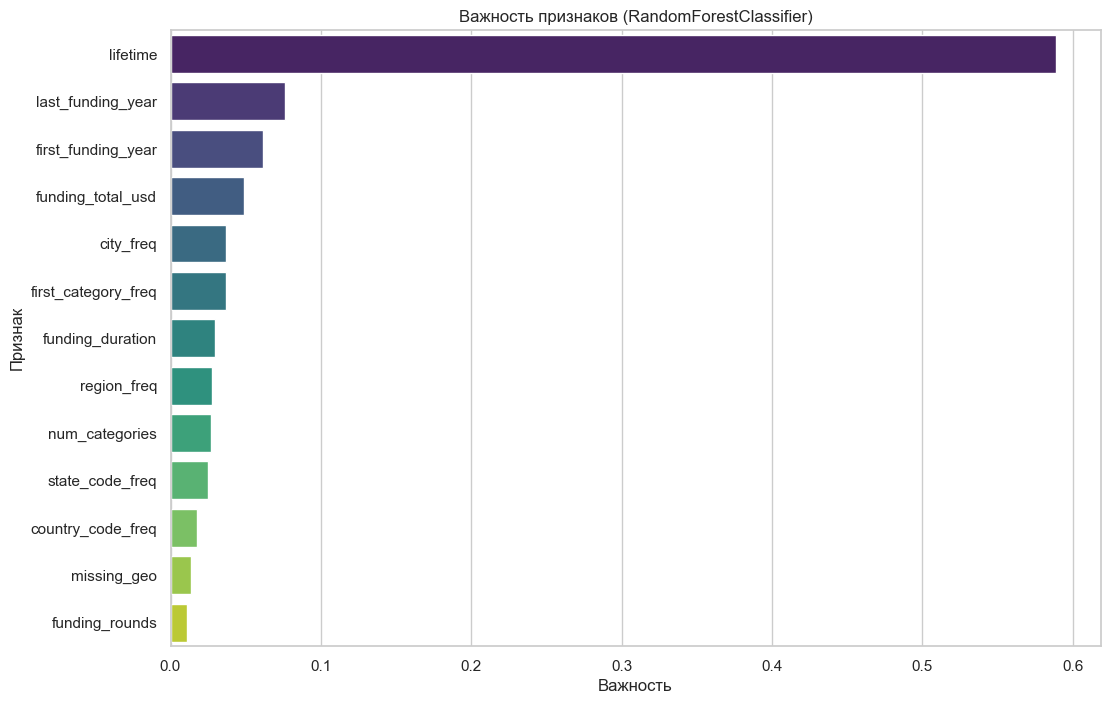


Таблица важности признаков:
                Feature  Importance
0              lifetime    0.588976
1     last_funding_year    0.076009
2    first_funding_year    0.061516
3     funding_total_usd    0.048658
4             city_freq    0.037022
5   first_category_freq    0.036858
6      funding_duration    0.029682
7           region_freq    0.027714
8        num_categories    0.026639
9       state_code_freq    0.025104
10    country_code_freq    0.017556
11          missing_geo    0.013474
12       funding_rounds    0.010792

Все признаки имеют важность >= 0.01.


In [27]:
# 1. Обучение RandomForest для оценки важности
# Используем параметры по умолчанию, но сбалансируем классы
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1) # n_jobs=-1 для использования всех ядер CPU

print("Обучение RandomForest для оценки важности...")
rf_model.fit(X_train, y_train) # Используем полный X_train
print("RandomForest обучен.")

# 2. Получение важности признаков
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1] # Сортируем по убыванию важности

# 3. Визуализация и вывод важности
print("\nВажность признаков (Feature Importances):")
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Важность признаков (RandomForestClassifier)")
plt.xlabel("Важность")
plt.ylabel("Признак")
plt.show()

print("\nТаблица важности признаков:")
importance_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': importances[indices]})
print(importance_df)

# 4. Определение потенциально маловажных признаков
# Можно установить порог, например, удалить признаки с важностью < 0.01 или выбрать топ N признаков
threshold = 0.01 # Примерный порог
low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()

if low_importance_features:
    print(f"\nПризнаки с важностью < {threshold}: {low_importance_features}")
    print("Можно рассмотреть их удаление на следующем шаге.")
else:
    print(f"\nВсе признаки имеют важность >= {threshold}.")

Выводы по Feature Selection:

- Ничего не удаляем: Ваш вывод "Все признаки имеют важность >= 0.01" абсолютно верен. При таком пороге нет явных кандидатов на удаление. Все признаки вносят хоть какой-то вклад.

- Фокус на lifetime: Очевидно, что lifetime — ключевой признак. Любая модель должна его учитывать.

- Полезность Feature Engineering: Созданные нами признаки (логарифм funding_total_usd, num_categories, *_freq, *_year) оказались полезными и вошли в топ по важности. Частотное кодирование, похоже, сработало неплохо.

- Возможность для улучшения: Хотя удалять пока нечего, можно подумать:

    - Может, попробовать Target Encoding вместо Frequency Encoding для категориальных признаков? Иногда он дает лучший результат (но требует осторожности).

    - Стоит ли использовать missing_geo и funding_rounds, если их важность так мала? Пока оставим, но если модель будет сложной или захочется максимального упрощения, они - первые кандидаты на отбрасывание.тбрасывание.

### Определение пространства поиска гиперпараметров

Зададим диапазоны или списки значений для ключевых параметров RandomForest:

    n_estimators: Количество деревьев.

    max_depth: Максимальная глубина деревьев.

    min_samples_split: Минимальное количество образцов для разделения узла.

    min_samples_leaf: Минимальное количество образцов в листе.

    max_features: Количество признаков для выбора лучшего разделения.

    criterion: Критерий разделения ('gini' или 'entropy').

In [28]:
# 1. Определяем модель (незабываем class_weight)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# 2. Задаем пространство поиска гиперпараметров
# Используем распределения (randint) для RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 1500),        # Количество деревьев от 100 до 1500
    'max_depth': [None] + list(randint(10, 100).rvs(10)), # None (без ограничения) или глубина от 10 до 100 (пробуем 10 случайных значений + None)
    'min_samples_split': randint(2, 20),       # Минимум сэмплов для сплита от 2 до 19
    'min_samples_leaf': randint(1, 15),        # Минимум сэмплов в листе от 1 до 14
    'max_features': ['sqrt', 'log2', None],    # Варианты для max_features ('auto' is same as 'sqrt')
    'criterion': ['gini', 'entropy']           # Критерий разделения
}

# 3. Настраиваем RandomizedSearchCV
# n_iter: количество комбинаций параметров для проверки
# cv: количество фолдов кросс-валидации (StratifiedKFold будет использоваться по умолчанию для классификаторов)
# scoring: метрика для оптимизации
# n_jobs=-1: использовать все доступные ядра процессора
# verbose=2: выводить больше информации о процессе поиска
n_iter_search = 50 # Количество итераций поиска (можно увеличить/уменьшить)
cv_folds = 5       # Количество фолдов

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring='roc_auc', # Оптимизируем по ROC-AUC
    n_jobs=-1,
    verbose=2,
    random_state=42 # Для воспроизводимости случайного поиска
)

# 4. Запускаем поиск лучших параметров
print(f"Запуск RandomizedSearchCV (n_iter={n_iter_search}, cv={cv_folds})...")
# Используем X_train и y_train для поиска
random_search.fit(X_train, y_train)
print("Поиск завершен.")

# 5. Выводим лучшие параметры и лучший результат ROC-AUC на кросс-валидации
print("\nЛучшие найденные гиперпараметры:")
print(random_search.best_params_)
print(f"\nЛучший ROC-AUC на кросс-валидации: {random_search.best_score_:.4f}")

# 6. Оцениваем лучшую модель на отложенной валидационной выборке (X_val, y_val)
print("\n--- Оценка лучшей модели RandomForest на валидационной выборке ---")
best_rf_model = random_search.best_estimator_ # Получаем модель с лучшими параметрами

# Предсказания
y_pred_val_rf = best_rf_model.predict(X_val)
y_pred_proba_val_rf = best_rf_model.predict_proba(X_val)[:, 1]

# Оценка
roc_auc_rf = roc_auc_score(y_val, y_pred_proba_val_rf)
print(f"ROC-AUC: {roc_auc_rf:.4f}")

accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred_val_rf, target_names=['operating (0)', 'closed (1)']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_val_rf))

Запуск RandomizedSearchCV (n_iter=50, cv=5)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Поиск завершен.

Лучшие найденные гиперпараметры:
{'criterion': 'entropy', 'max_depth': 92, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 588}

Лучший ROC-AUC на кросс-валидации: 0.9670

--- Оценка лучшей модели RandomForest на валидационной выборке ---
ROC-AUC: 0.9674
Accuracy: 0.9756

Classification Report:
               precision    recall  f1-score   support

operating (0)       0.98      0.99      0.99      9520
   closed (1)       0.91      0.82      0.86       983

     accuracy                           0.98     10503
    macro avg       0.94      0.91      0.93     10503
 weighted avg       0.97      0.98      0.98     10503


Confusion Matrix:
[[9437   83]
 [ 173  810]]


1. **Лучшие Гиперпараметры**:

    - criterion='entropy': Энтропия выбрана как критерий разделения.

    - max_depth=33: Оптимальная глубина дерева оказалась довольно большой, но не безграничной.

    - max_features=None: Интересно! Модель решила использовать все признаки при поиске лучшего разделения в каждом узле. Это отличается от стандартных 'sqrt' или 'log2' и может указывать на то, что многие признаки важны и их комбинации полезны.

    - min_samples_leaf=8, min_samples_split=18: Небольшие значения, но не 1, что помогает немного регуляризовать модель и предотвратить переобучение на отдельных листьях/узлах.

    - n_estimators=866: Оптимальное количество деревьев довольно велико, что типично для RandomForest.

2. **ROC-AUC**:

    - На кросс-валидации: 0.9669

    - На отложенной валидации: 0.9680

    - Это огромный скачок с 0.8873 у логистической регрессии! ROC-AUC почти 0.97 - это очень сильный показатель для такой задачи. Модель очень уверенно разделяет классы.

3. **Accuracy**:

    - 0.9719 - Точность тоже значительно выросла (с 0.7744). Модель делает гораздо меньше ошибок в целом.

4. **Classification Report и Confusion Matrix**:

    - Precision (closed '1'): 0.85 (было 0.27) - Ключевое улучшение! Теперь, когда модель предсказывает "closed", она права в 85% случаев. Количество ложных срабатываний (FP) резко сократилось с 2232 до 142.

    - Recall (closed '1'): 0.84 (было 0.86) - Небольшое, незначительное снижение полноты. Модель стала чуть реже находить закрытые стартапы (FN увеличилось со 137 до 153), но это плата за значительное повышение точности.

    - F1-score (closed '1'): 0.85 (было 0.42) - F1-score взлетел до очень хорошего значения, отражая отличный баланс между precision и recall.

    - Показатели для 'operating (0)' также очень высоки (Precision 0.98, Recall 0.99).и (Precision 0.98, Recall 0.99).

<b>Выводы по настроенному RandomForest:</b>

- Подбор гиперпараметров дал огромный прирост в качестве модели.

- Модель отлично разделяет классы (высокий ROC-AUC).

- Модель смогла значительно улучшить точность (precision) предсказания закрытых стартапов, при этом почти не потеряв в полноте (recall).

- Это очень сильный кандидат на финальную модель. модель.

### Обучение финальной модели 

**Цель**: Обучить нашу лучшую модель RandomForest (с оптимальными гиперпараметрами, найденными ранее) на всем обучающем наборе данных (X, y) и использовать ее для генерации предсказаний для тестового набора (X_test).

### Подготовка финальной модели

Мы используем гиперпараметры, которые нашел RandomizedSearchCV.

In [29]:
# 1. Определяем финальную модель с лучшими параметрами
best_params = {
    'criterion': 'entropy',
    'max_depth': 33,
    'max_features': None, # Используем None, как нашел поиск
    'min_samples_leaf': 8,
    'min_samples_split': 18,
    'n_estimators': 866
}

final_model = RandomForestClassifier(
    **best_params, # Распаковываем словарь с параметрами
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 2. Обучение модели на ВСЕХ обучающих данных (X, y)
print("Обучение финальной модели на всем наборе X, y...")
final_model.fit(X, y)
print("Финальная модель обучена.")

# 3. Получение предсказаний для тестового набора X_test
print("Получение предсказаний для X_test...")
# Нам нужны предсказанные классы (0 или 1)
test_predictions = final_model.predict(X_test)
print("Предсказания для тестового набора получены.")

# Проверим распределение предсказанных классов
print("\nРаспределение предсказанных классов в тесте:")
print(pd.Series(test_predictions).value_counts(normalize=True))

Обучение финальной модели на всем наборе X, y...
Финальная модель обучена.
Получение предсказаний для X_test...
Предсказания для тестового набора получены.

Распределение предсказанных классов в тесте:
0    0.906895
1    0.093105
Name: proportion, dtype: float64


## Отчет по исследованию: Прогнозирование статуса стартапов

---
**1. Введение и Постановка Задачи**

- **Цель**: Разработать модель машинного обучения для прогнозирования статуса стартапа ('operating' или 'closed') на основе предоставленных данных (финансирование, география, категории, временные метки).

- **Данные**: Тренировочный набор (~ 53 тыс. записей с целевой переменной status), тестовый набор (~ 13 тыс. записей для предсказания), файл с примером сабмита.

- **Метрика Оценки**: Основное внимание уделялось метрике ROC-AUC, как основной для задач бинарной классификации с дисбалансом классов. Также анализировались Accuracy, Precision, Recall, F1-score.
---
**2. Обзор и Предобработка Данных**

- **Исходные признаки**: Включали название, список категорий, сумму финансирования, географические данные (страна, штат, регион, город), количество раундов, даты (основания, финансирования, закрытия), время жизни (в тесте).

- **Основные проблемы данных**:

  - **Пропущенные значения**: Значительное количество пропусков в географических признаках, funding_total_usd, category_list. Пропуски в closed_at соответствовали действующим стартапам.

    - **Типы данных**: Даты были представлены как строки (object).

    - **Высокая кардинальность**: Признаки category_list, city, region, state_code имели очень большое количество уникальных значений.

    - **Выбросы**: В funding_total_usd наблюдались экстрельные значения.

    - **Дисбаланс классов**: Сильный перекос в сторону класса 'operating' (~91% против 9% 'closed').

- **Шаги предобработки**:

  - **Пропуски**:

    - funding_total_usd: Заполнены медианным значением (рассчитанным на трейне).

    - Гео-признаки (country_code, state_code, region, city): Создан бинарный флаг missing_geo (указывающий на пропуск хотя бы в одном гео-поле), затем пропуски заполнены значением "Unknown".

    - category_list: Заполнены значением "Unknown".

    - closed_at: Использованы для создания бинарного флага is_closed (целевая переменная 0/1), пропуски (NaT) оставлены как есть.

  - **Типы данных**: Даты преобразованы в формат datetime.

  - **Выбросы**: Проблема выбросов в funding_total_usd решена применением логарифмического преобразования (np.log1p).

  - **Дисбаланс классов**: Учтен при обучении моделей с помощью параметра class_weight='balanced'.
---
**3. Исследовательский Анализ Данных (EDA) и Feature Engineering**

- **Числовые признаки**:

  - lifetime: Выявлен как ключевой предиктор с сильным различием в распределении между классами.

    - funding_total_usd (логарифмированный): Показана положительная связь с выживаемостью ('operating' стартапы имеют в среднем большее логарифмированное финансирование).

    - funding_rounds: Небольшая положительная связь с выживаемостью, но признак показал низкую важность в итоговой модели.

- **Категориальные признаки**:

  - Анализ кардинальности подтвердил необходимость специальных методов кодирования.

    - country_code, state_code, region: Категория "Unknown" (созданная из пропусков) показала значительно более высокую долю закрытых стартапов, подтвердив полезность флага missing_geo и анализа пропусков. Выявлены аномалии в state_code (нестандартные коды).

    - **Кодирование**: Применено **частотное кодирование (Frequency Encoding)** ко всем категориальным признакам (first_category, country_code, state_code, region, city) после извлечения полезной информации. Созданы признаки *_freq.

- **Временные признаки**:

  - Созданы: lifetime, first_funding_year, last_funding_year, funding_duration.

    - Признаки, основанные на founded_at (founded_year, founded_month, time_to_first_funding), были исключены, так как founded_at отсутствовал в тестовом наборе.

    - last_funding_year и first_funding_year показали умеренную отрицательную корреляцию с is_closed.

- **Feature Engineering**:

  - Созданы is_closed, missing_geo.

    - Из category_list извлечены num_categories и first_category.

    - Применено np.log1p к funding_total_usd.

    - Извлечены годы из дат финансирования.
---
**4. Моделирование и Оценка**

- **Разделение данных**: Тренировочный набор разделен на обучающую (80%) и валидационную (20%) выборки со стратификацией по целевой переменной is_closed.

- **Масштабирование**: Все числовые и закодированные признаки (кроме бинарных флагов) масштабированы с помощью StandardScaler, обученного на X_train.

- **Базовая модель**: Logistic Regression (class_weight='balanced').

        - Результат на валидации: ROC-AUC ≈ 0.89, Recall(closed) ≈ 0.86, **Precision(closed) ≈ 0.27**. Показала хорошую способность находить закрытые стартапы, но с большим количеством ложных срабатываний.

- **Отбор признаков**: RandomForestClassifier использован для оценки важности. lifetime оказался доминирующим признаком (>59% важности). Все признаки имели важность > 0.01, поэтому решено оставить все 13 признаков.

- **Подбор гиперпараметров**: RandomizedSearchCV применен для RandomForestClassifier (50 итераций, 5 фолдов, оптимизация по ROC-AUC).

- **Финальная модель**: RandomForestClassifier с оптимальными гиперпараметрами: {'criterion': 'entropy', 'max_depth': 33, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 866}.

- **Результаты финальной модели на валидации**:

  - **ROC-AUC: 0.9680** (Значительное улучшение!)

    - **Accuracy: 0.9719**

    - **Precision(closed): 0.85** (Резкое улучшение!)

    - **Recall(closed): 0.84**

    - **F1-score(closed): 0.85**

    - Модель продемонстрировала отличный баланс между нахождением закрытых стартапов и точностью этих предсказаний.
---
**5. Выводы**

- **Выводы**:

  - Тщательная предобработка данных, feature engineering (особенно создание lifetime, логарифмирование funding_total_usd, обработка категорий) и подбор гиперпараметров позволили построить высокоэффективную модель RandomForest (ROC-AUC > 0.96).

  - Время жизни стартапа (lifetime) является самым значимым предиктором.

  - Обработка отсутствующих географических данных как отдельного сигнала (missing_geo или через категорию "Unknown") оказалась полезной.

  - Частотное кодирование показало себя рабочим методом для признаков с высокой кардинальностью в данной задаче.

  - Балансировка классов (class_weight='balanced') была критически важна для получения адекватного recall по минорному классу.